In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\Aryan\Desktop\Data\Adult\adult.csv")

In [2]:
df = df.replace('?',np.nan)

In [3]:
df = df.dropna()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
age                45222 non-null int64
workclass          45222 non-null object
fnlwgt             45222 non-null int64
education          45222 non-null object
educational-num    45222 non-null int64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
gender             45222 non-null object
capital-gain       45222 non-null int64
capital-loss       45222 non-null int64
hours-per-week     45222 non-null int64
native-country     45222 non-null object
income             45222 non-null object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [5]:
df.describe()

age        fnlwgt  educational-num  capital-gain  \
count  45222.000000  4.522200e+04     45222.000000  45222.000000   
mean      38.547941  1.897347e+05        10.118460   1101.430344   
std       13.217870  1.056392e+05         2.552881   7506.430084   
min       17.000000  1.349200e+04         1.000000      0.000000   
25%       28.000000  1.173882e+05         9.000000      0.000000   
50%       37.000000  1.783160e+05        10.000000      0.000000   
75%       47.000000  2.379260e+05        13.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  45222.000000    45222.000000  
mean      88.595418       40.938017  
std      404.956092       12.007508  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

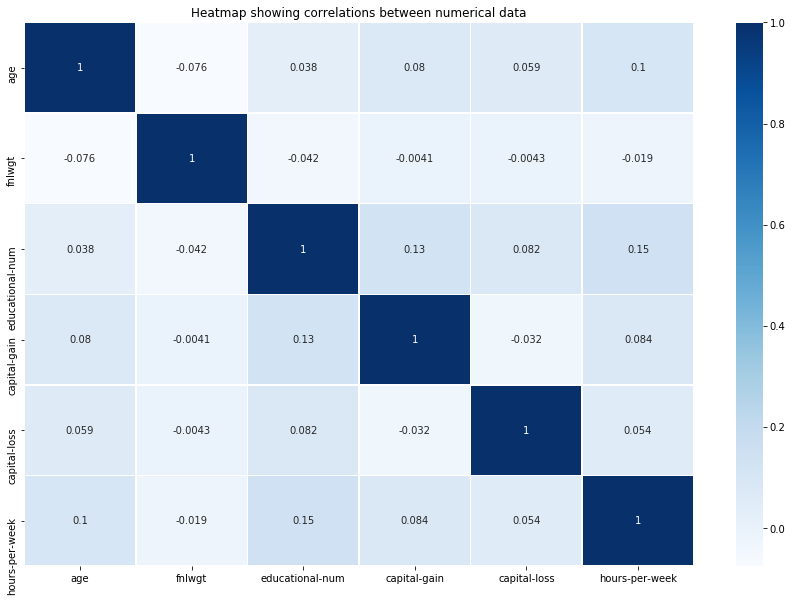

In [6]:
import seaborn as sns
plt.figure(figsize=(15,10))  
sns.heatmap(df.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

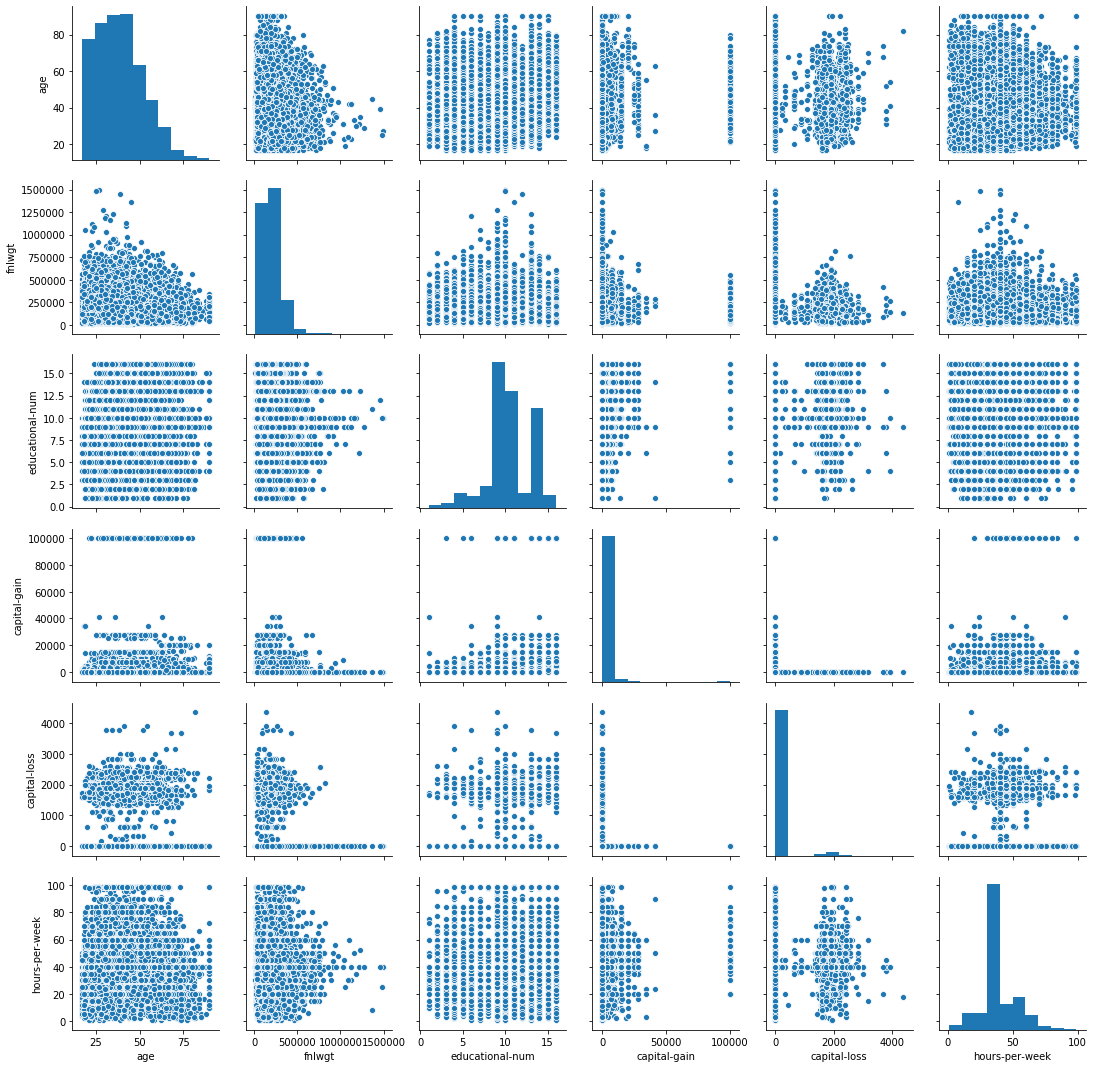

In [7]:
sns.pairplot(df)

In [8]:
objs = ['workclass','education','marital-status','occupation','relationship','race','gender','native-country','income']

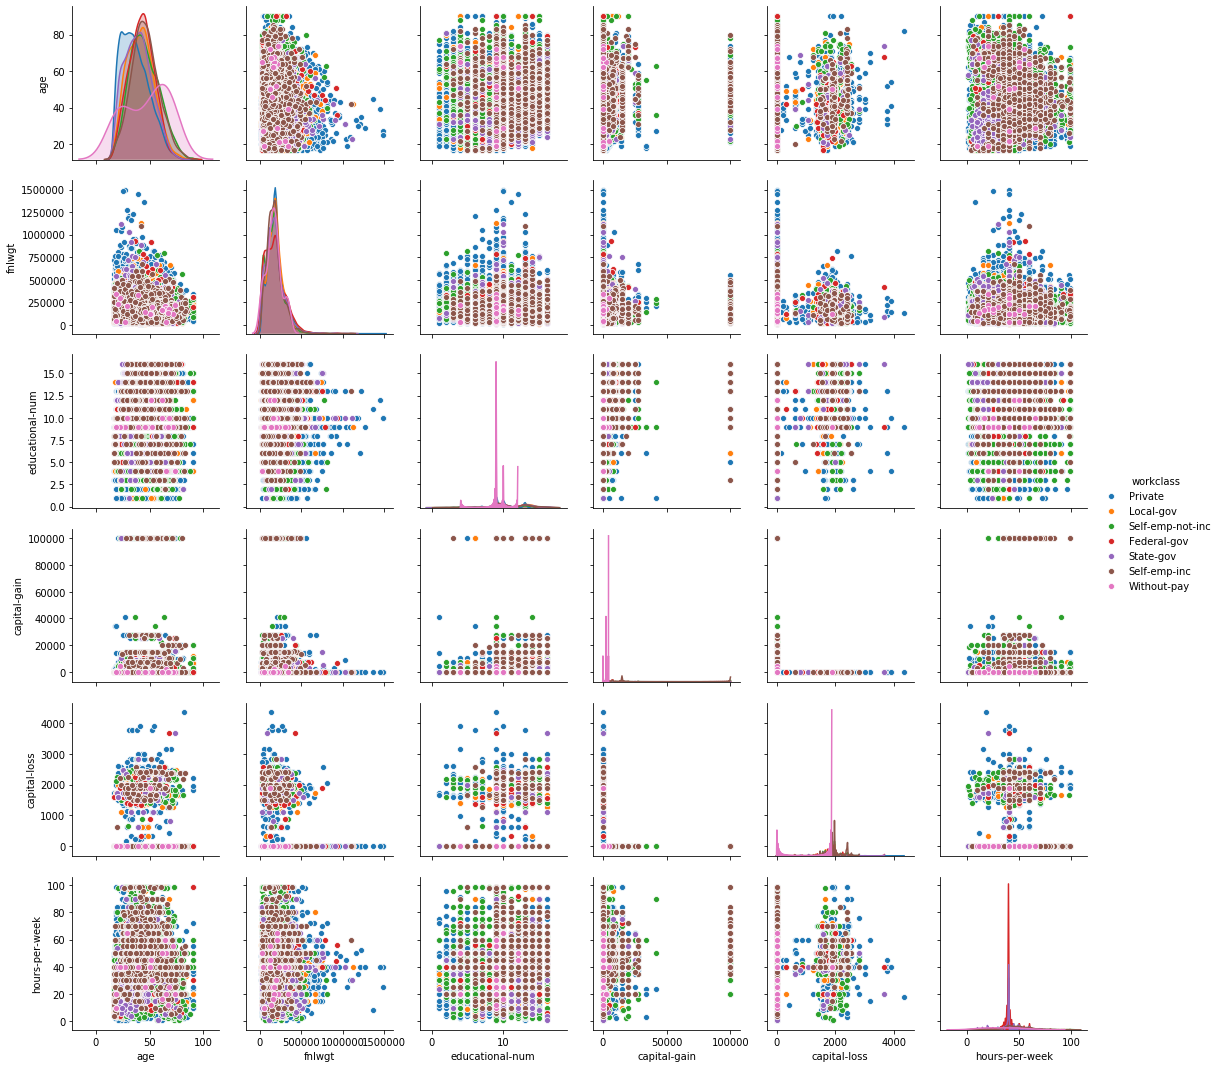

C:\Users\Aryan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Aryan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


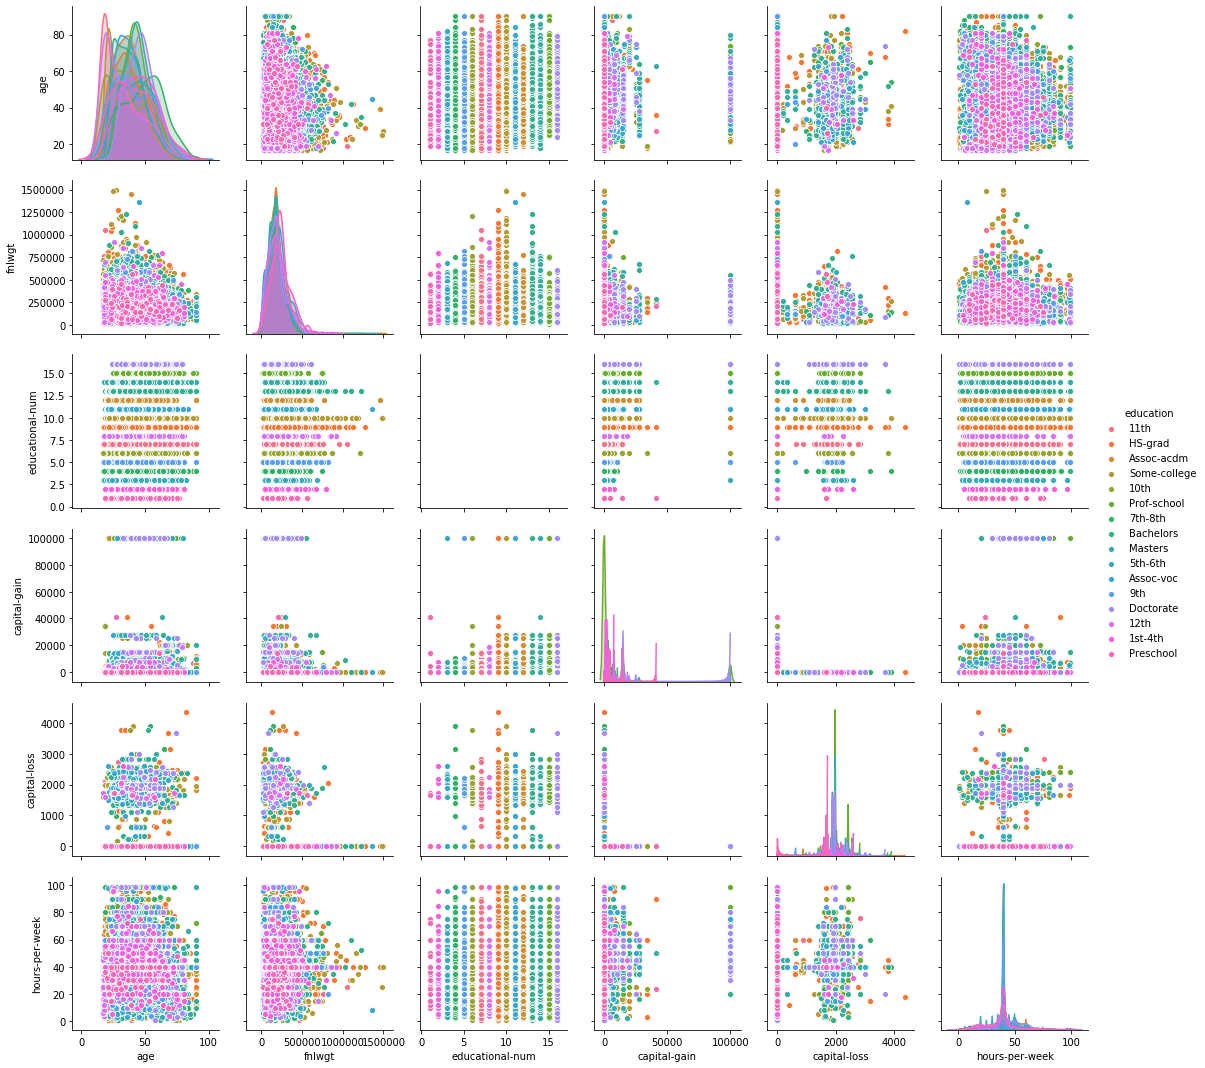

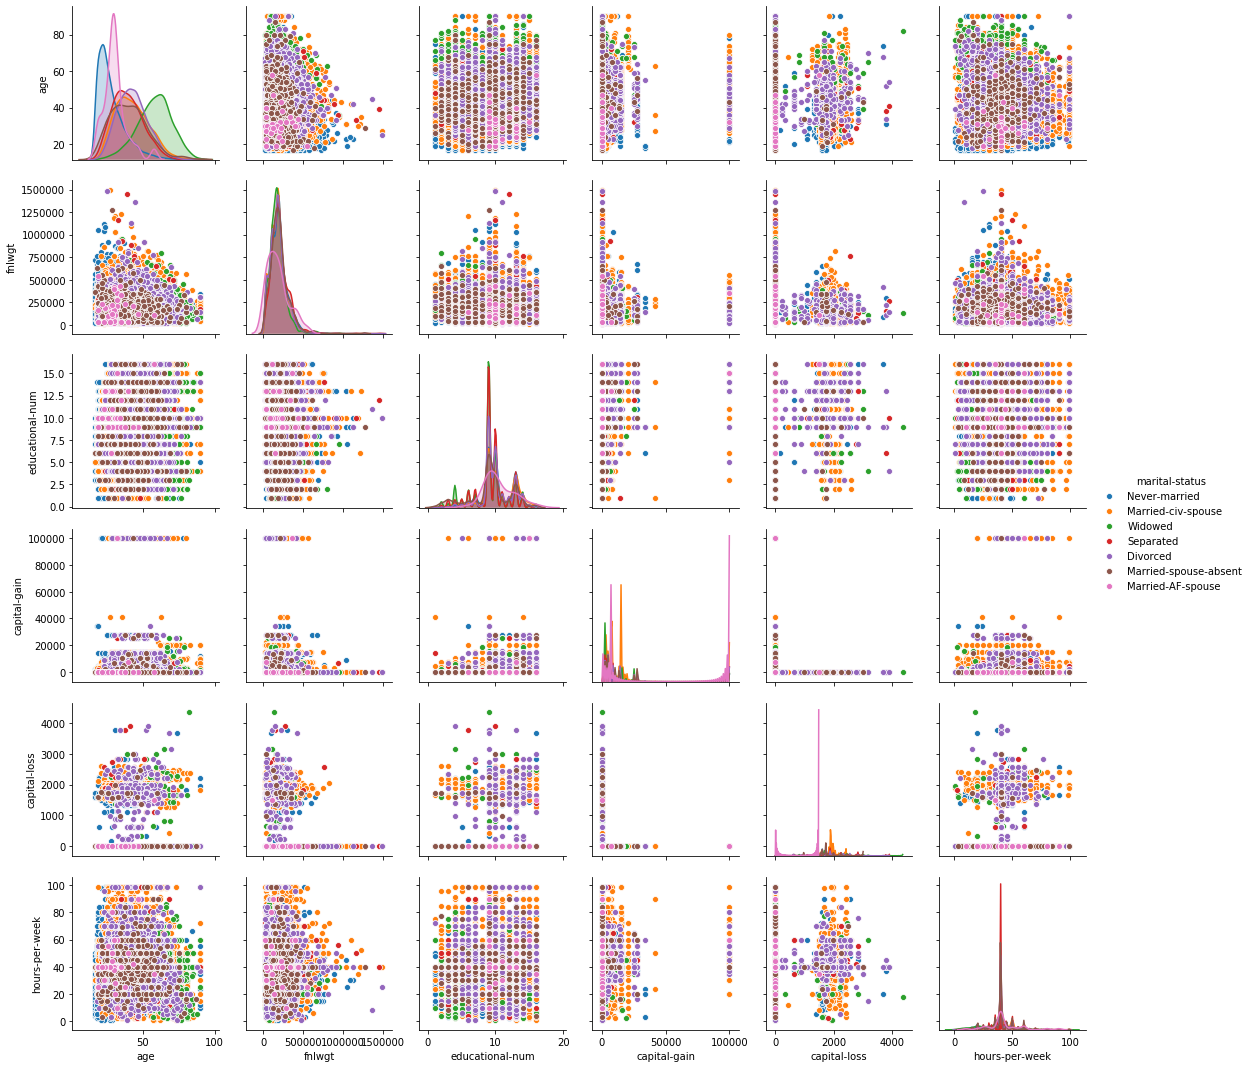

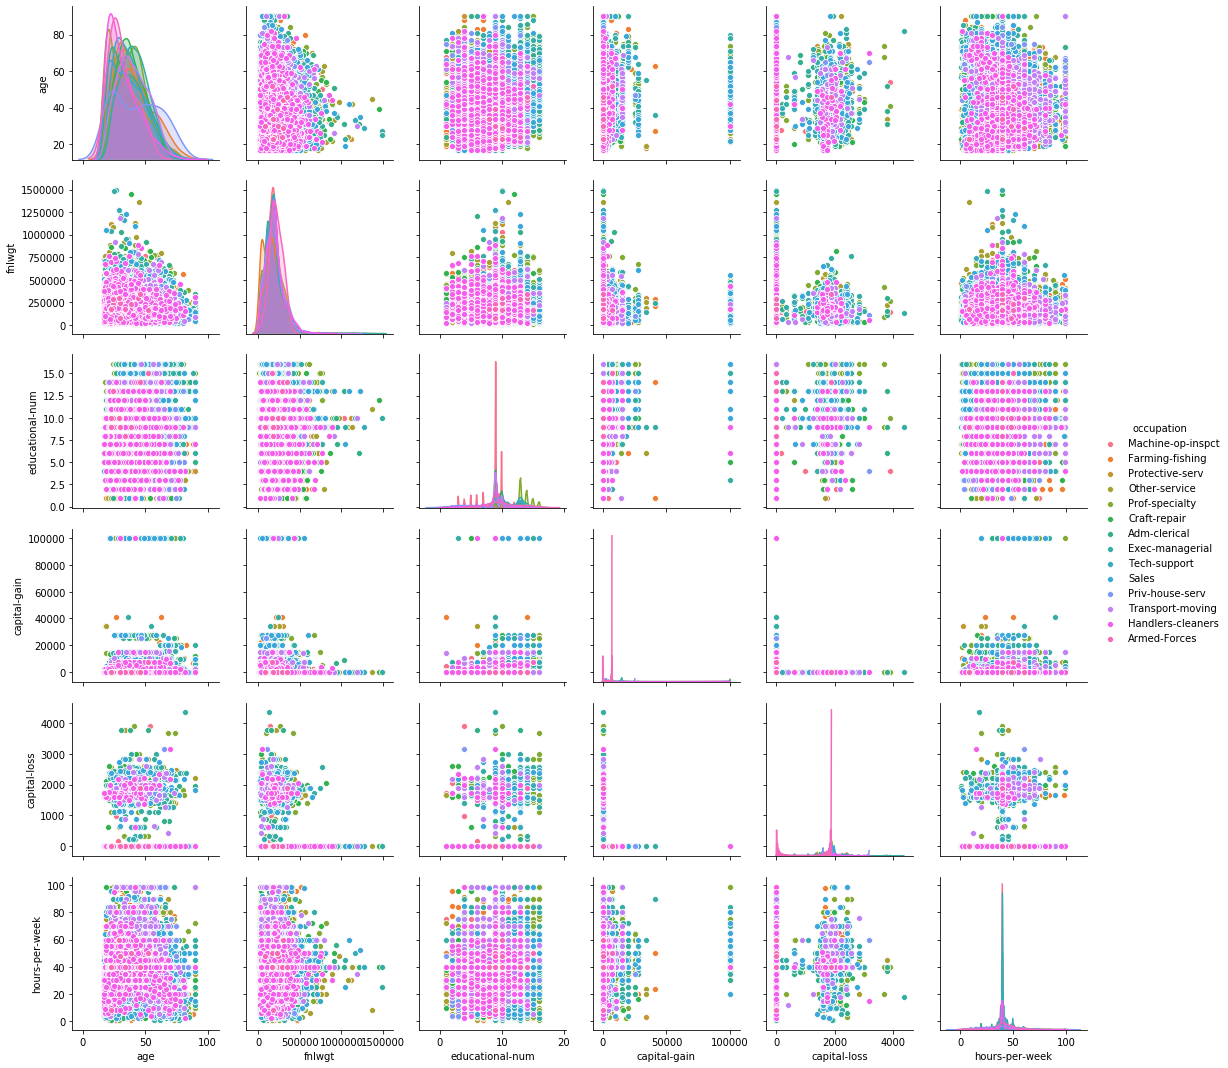

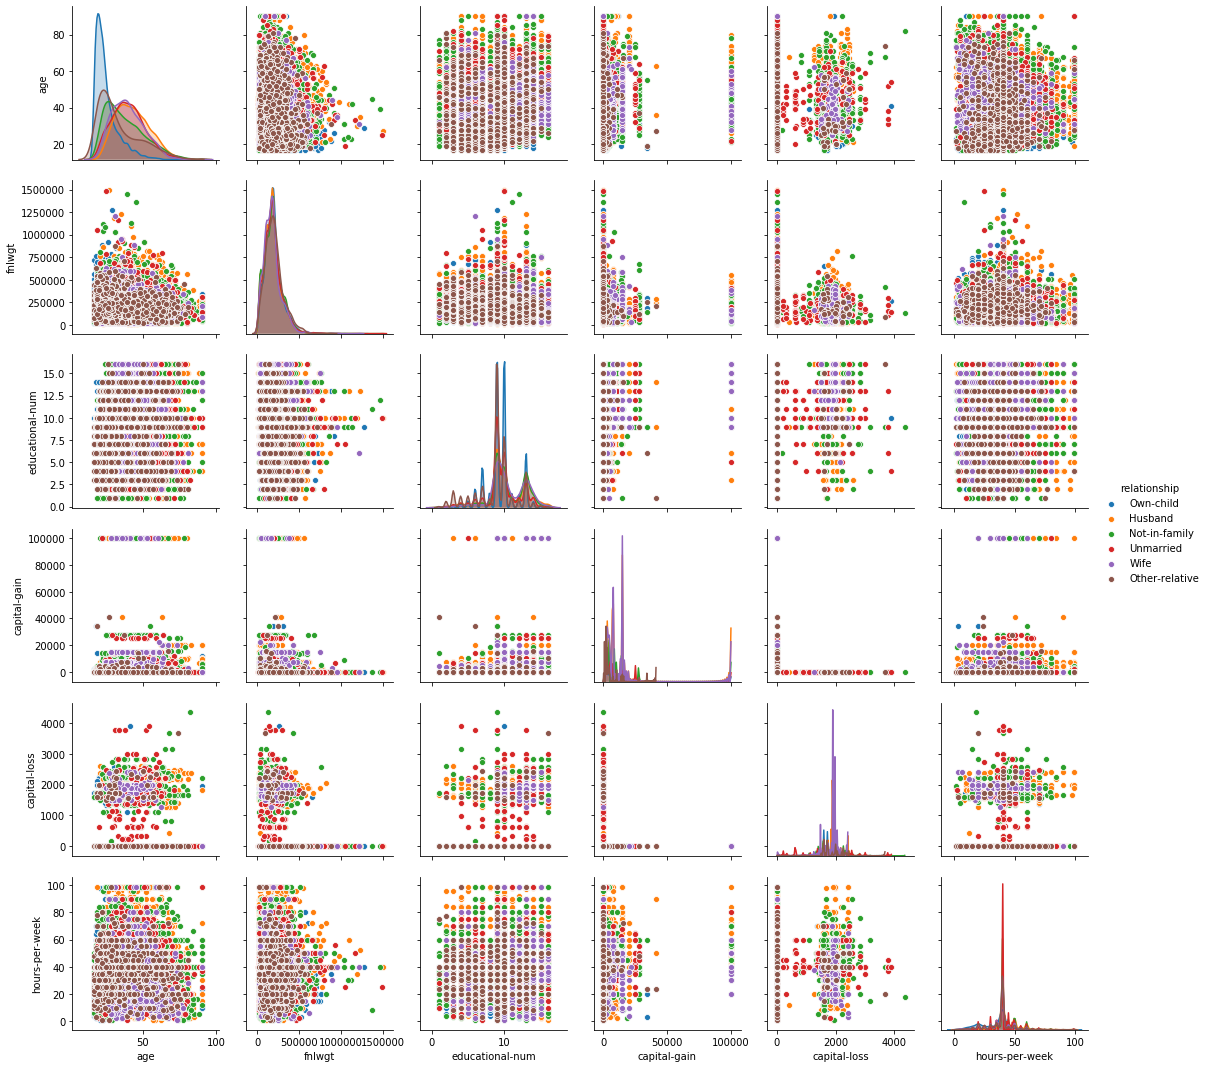

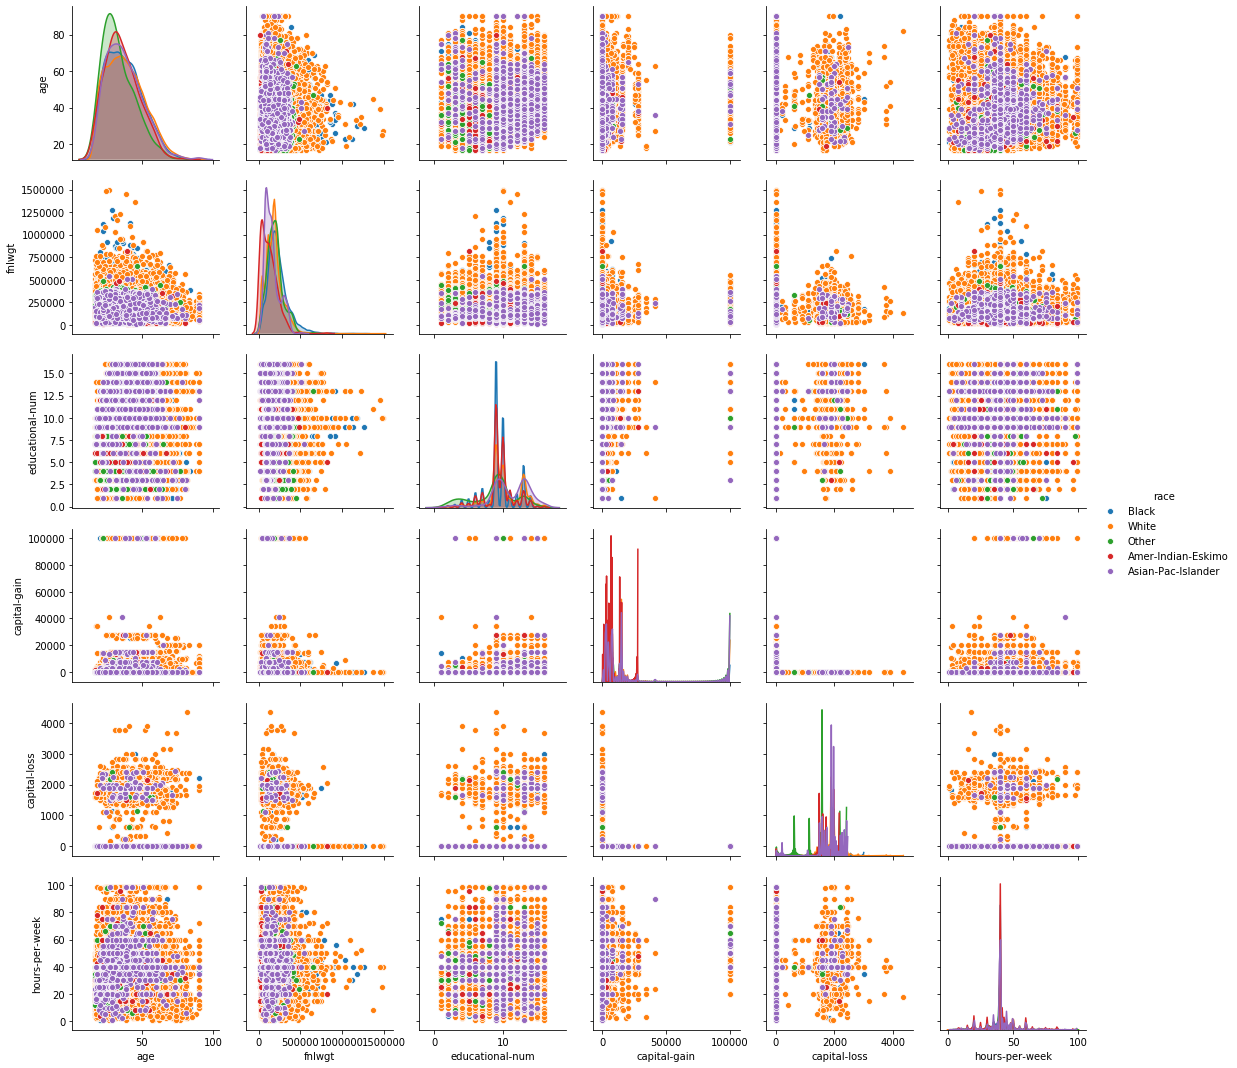

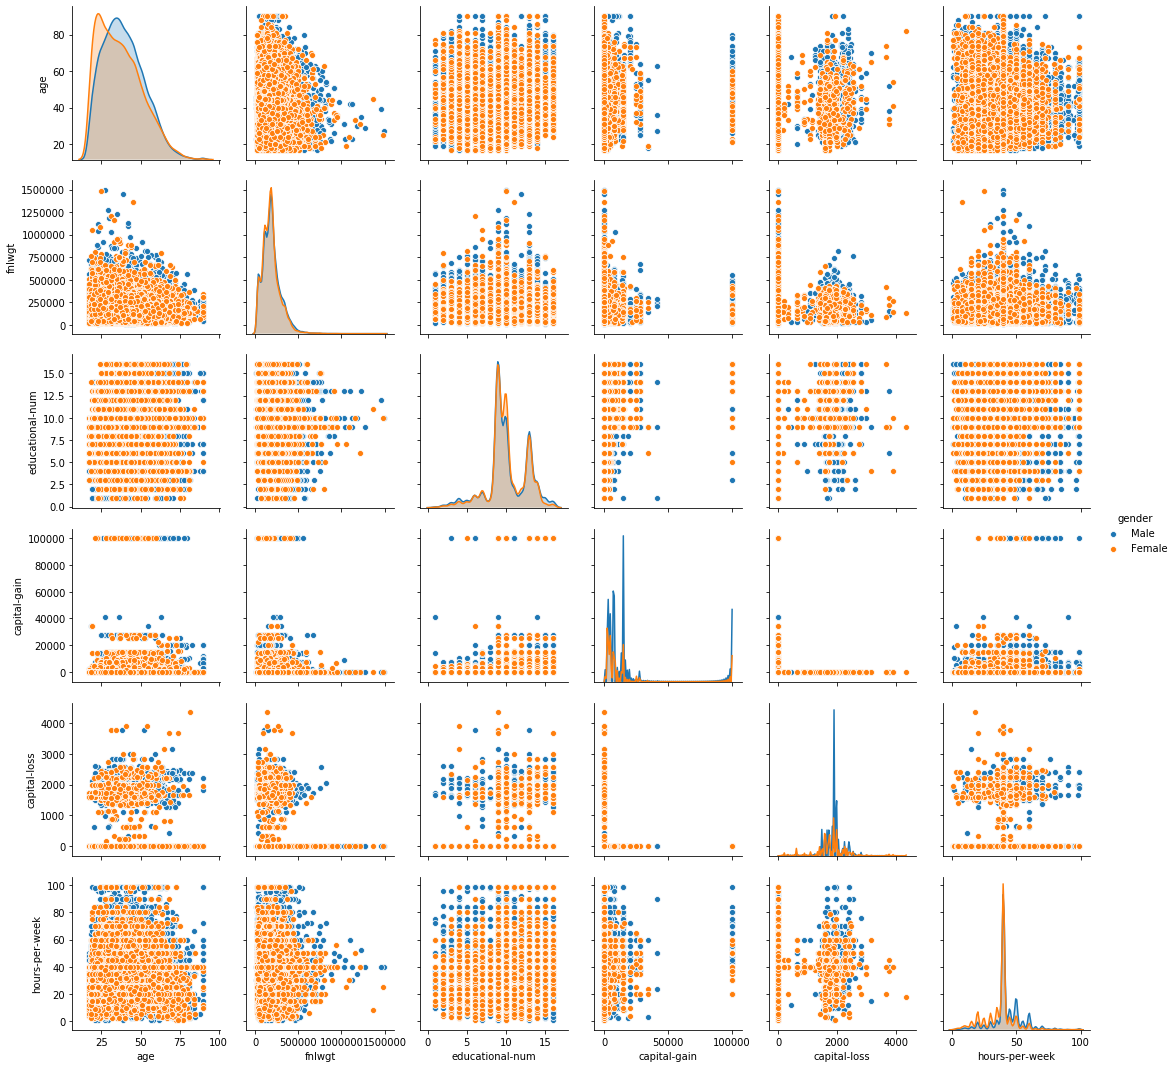

C:\Users\Aryan\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Aryan\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


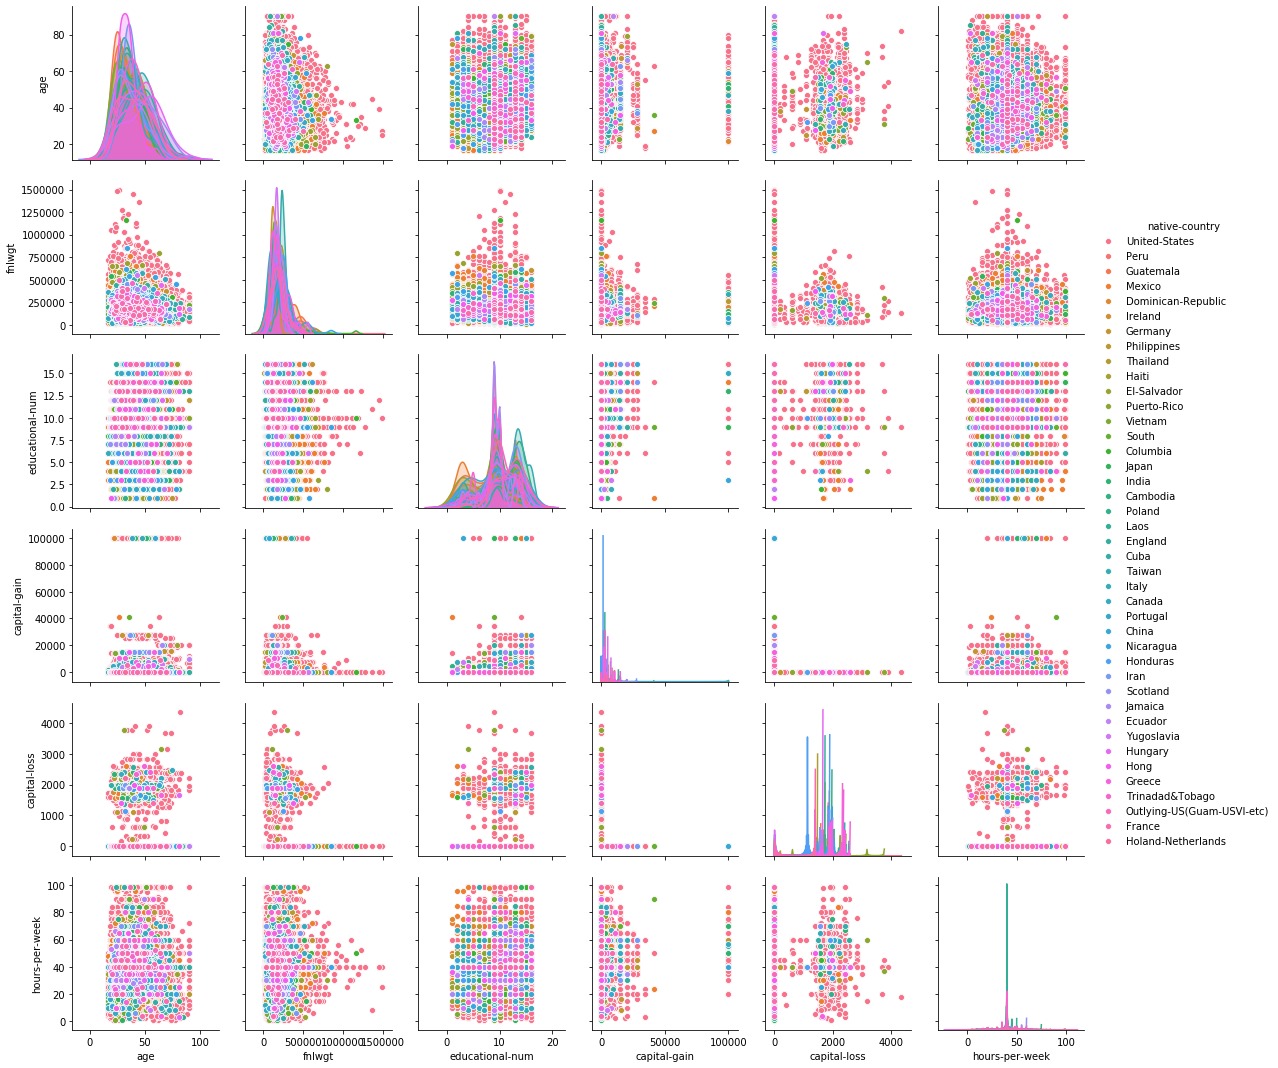

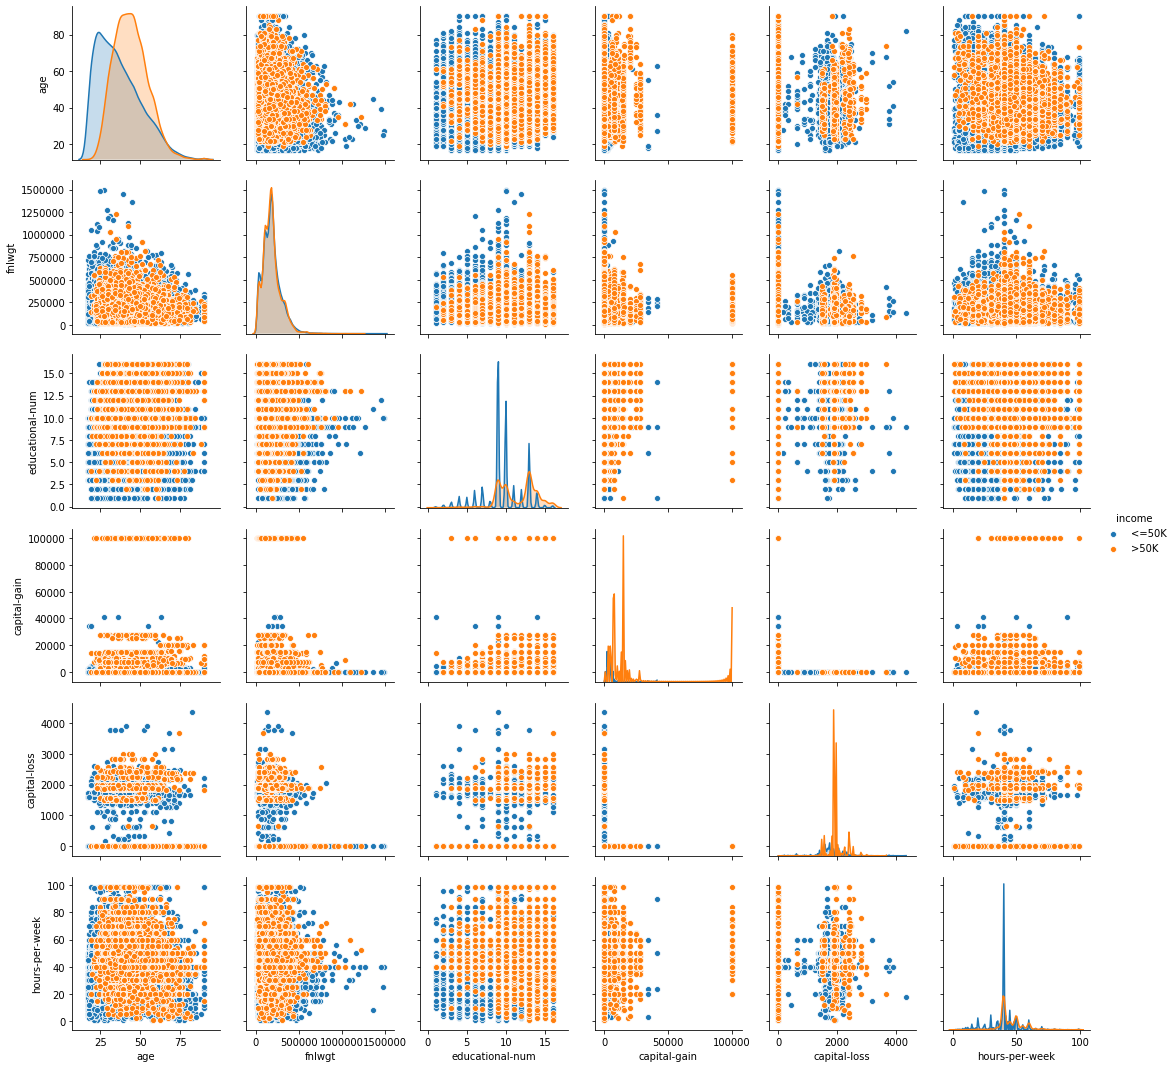

In [9]:
for i in objs:
    sns.pairplot(hue=i,data=df);
    plt.show()
    print('\n')

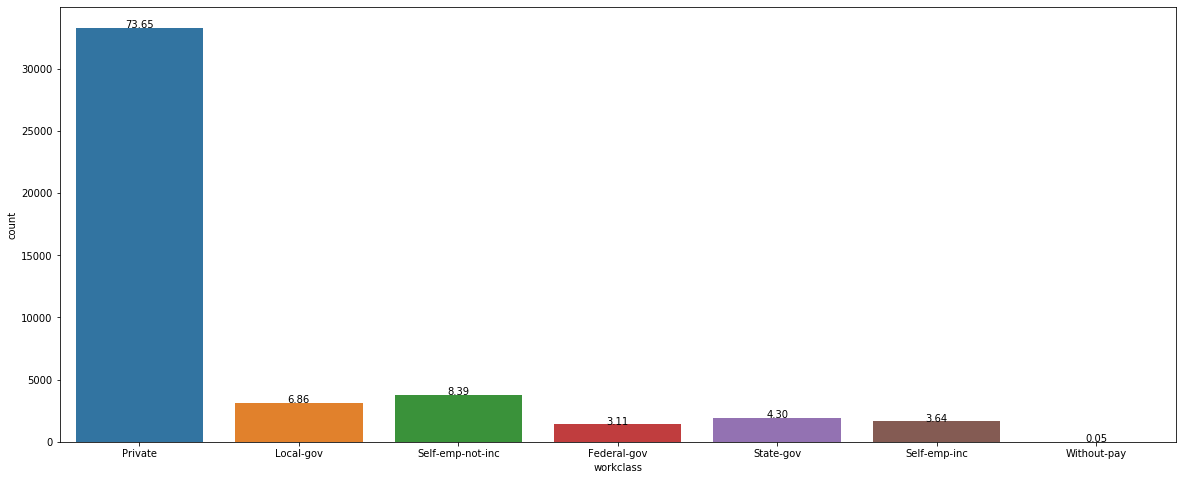

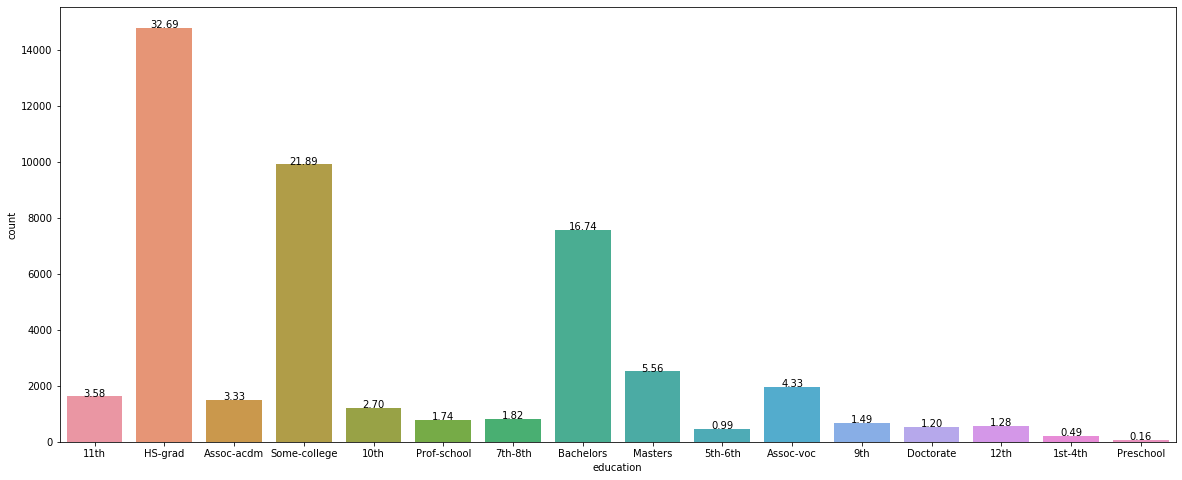

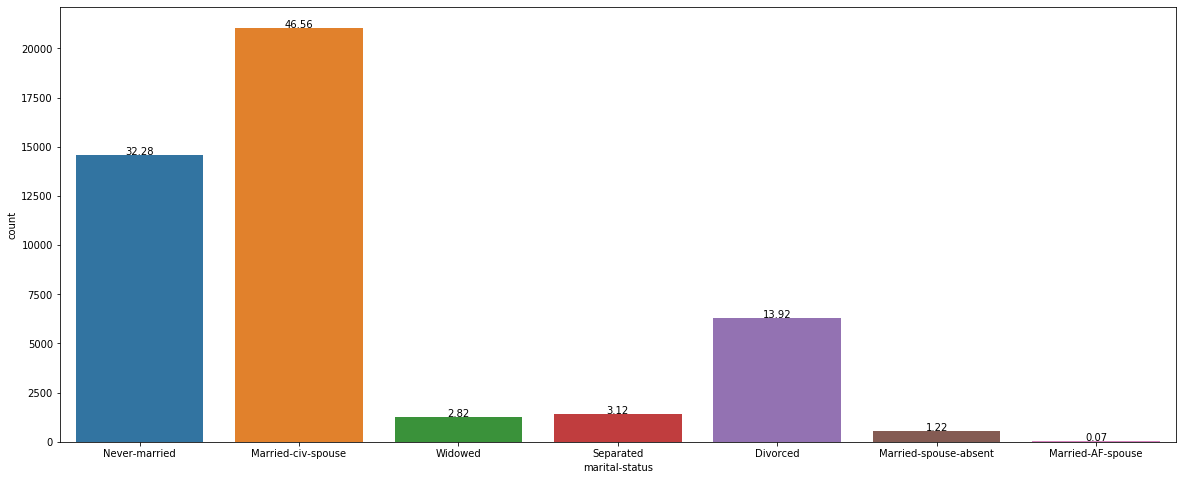

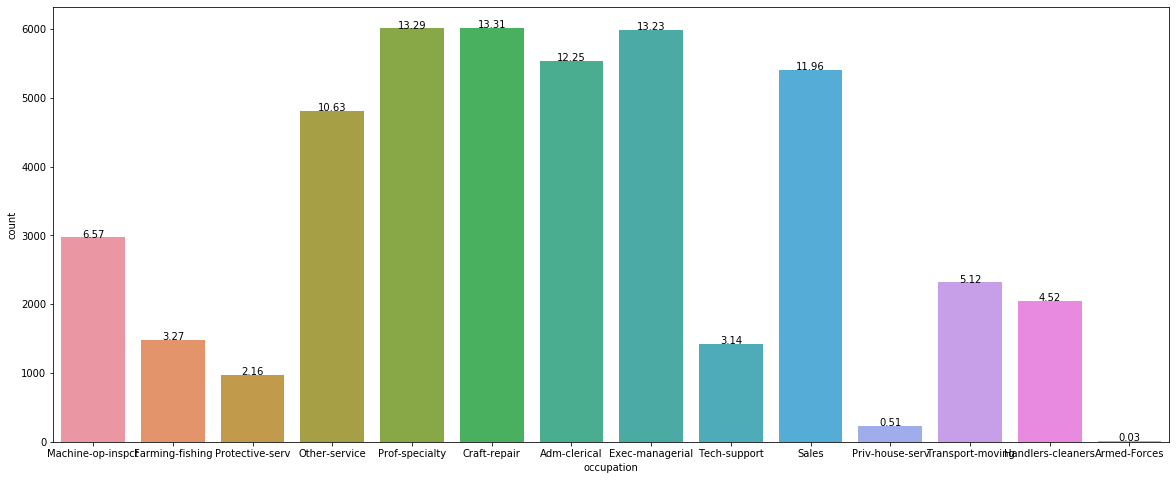

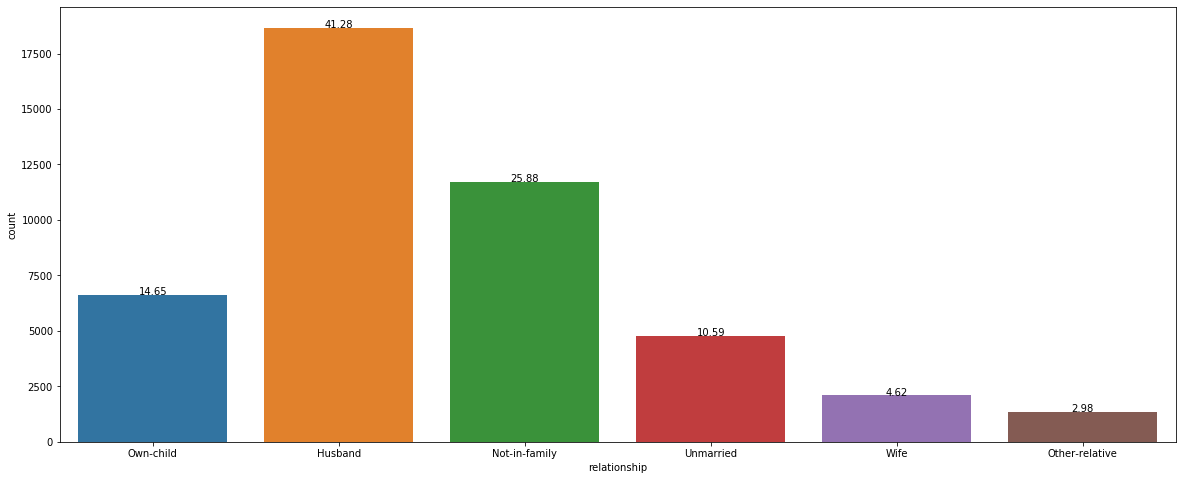

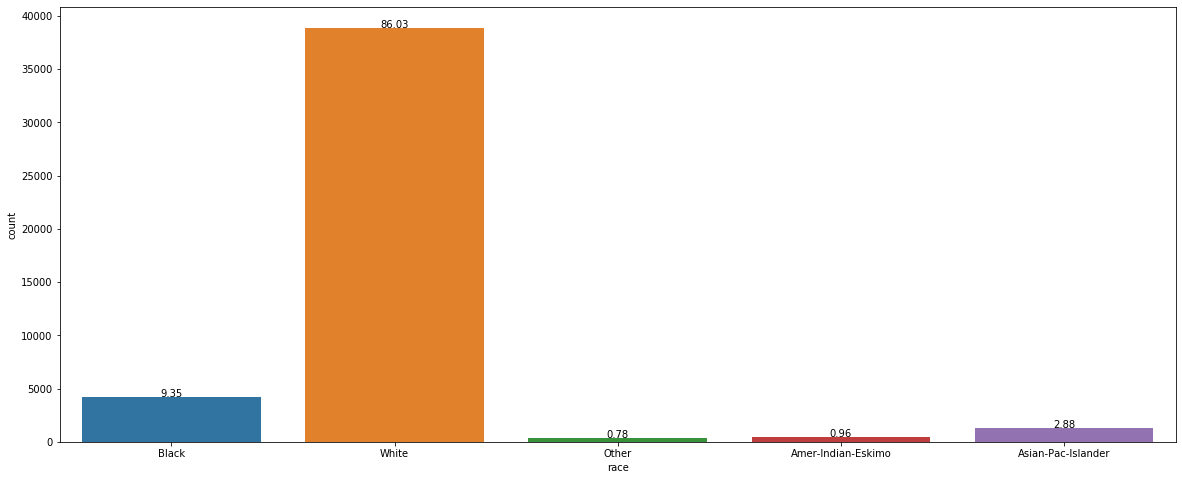

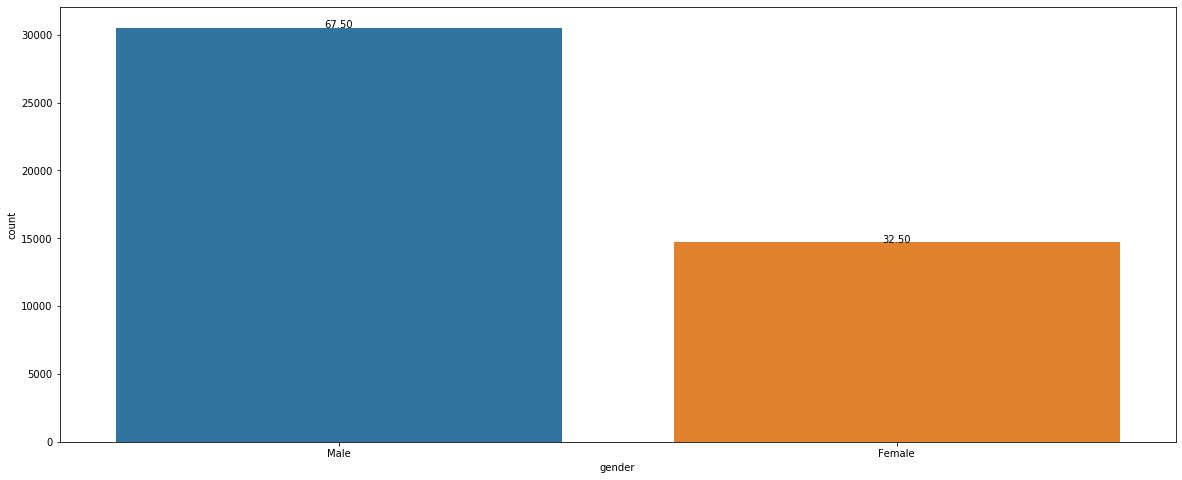

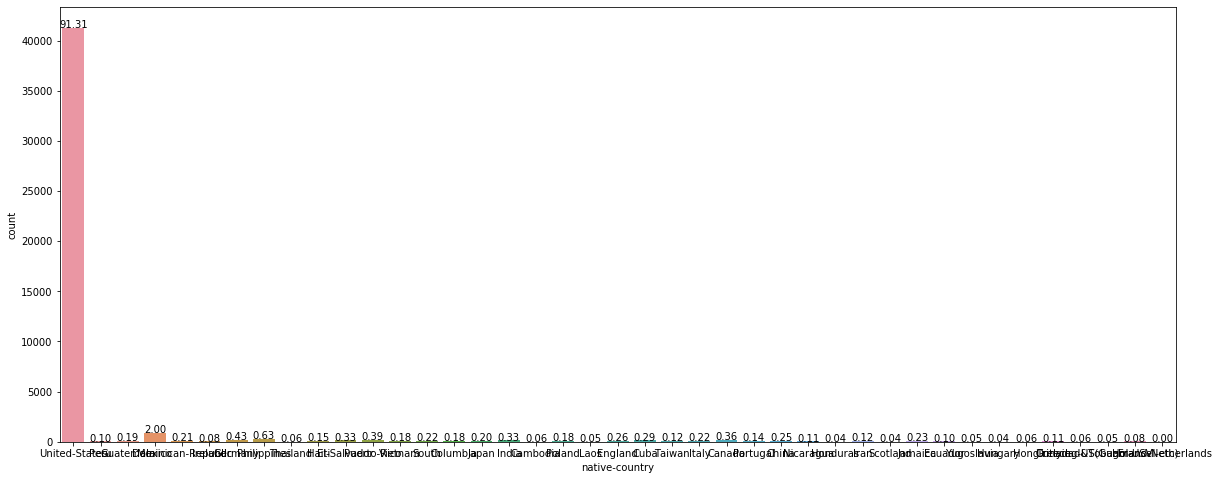

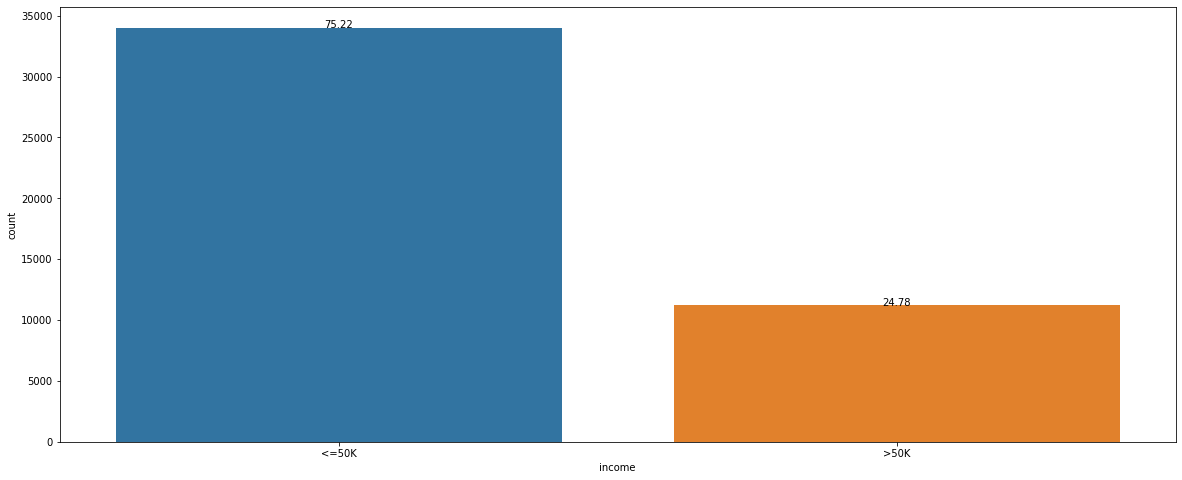

In [10]:
total = float(len(df["income"]))
for i in objs:
    plt.figure(figsize=(20,8))

    ax = sns.countplot(x=i, data=df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

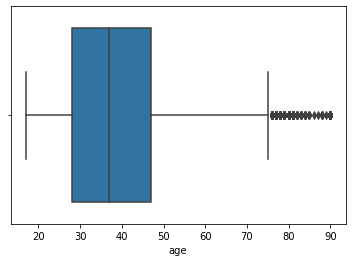

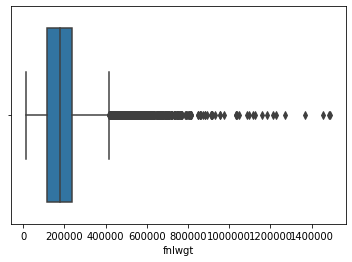

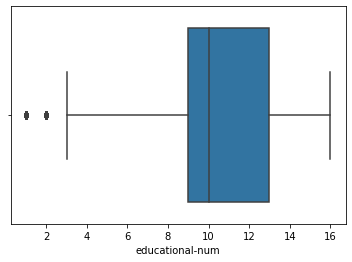

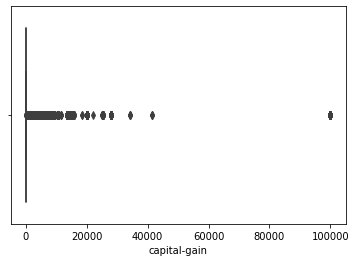

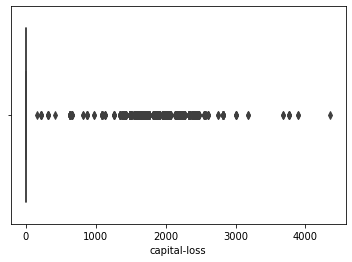

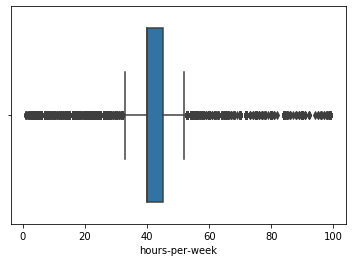

In [11]:
for i in ['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']:
    sns.boxplot(df[i])
    plt.show()

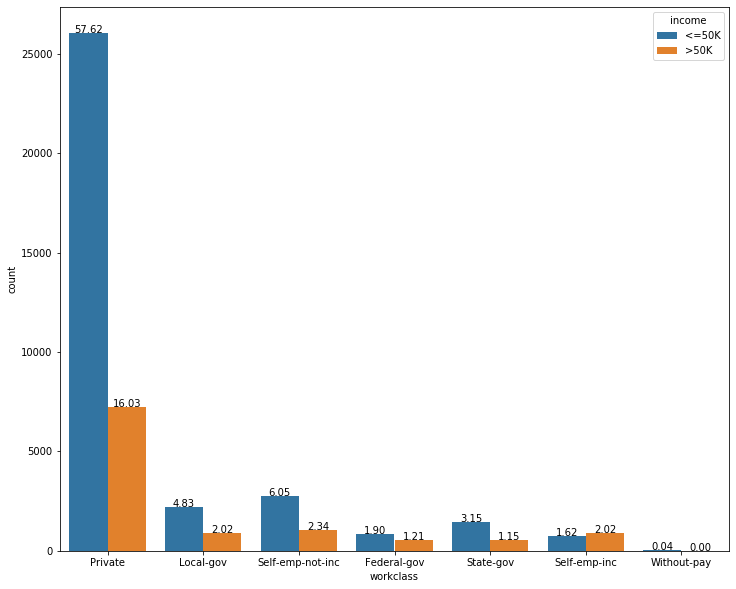

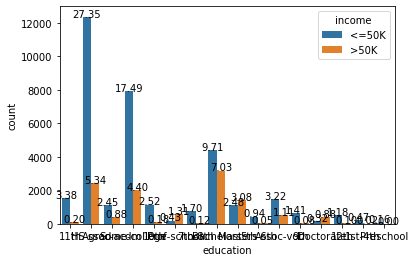

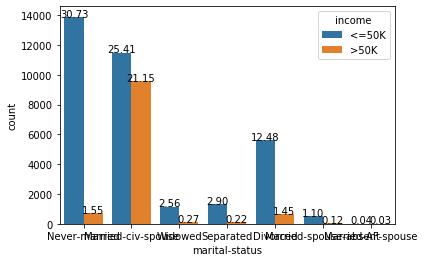

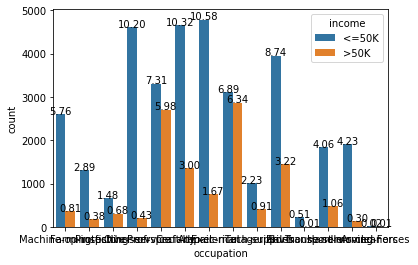

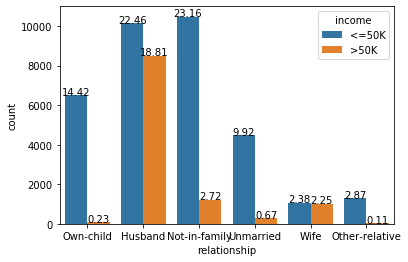

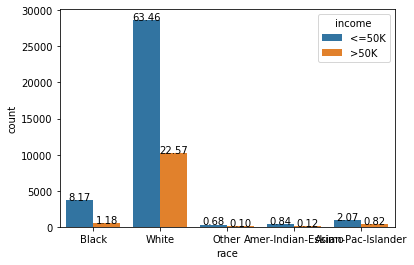

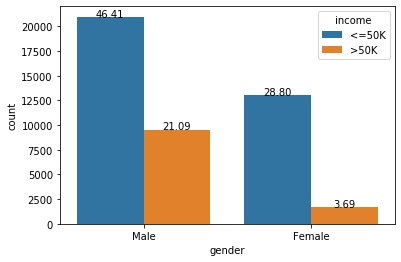

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


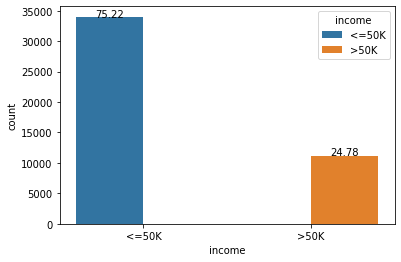

In [12]:
plt.figure(figsize=(12,10))
total = float(len(df["income"]) )

for i in ['workclass','education','marital-status','occupation','relationship','race','gender','income']:
    ax = sns.countplot(x=i, hue="income", data=df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
    plt.show()

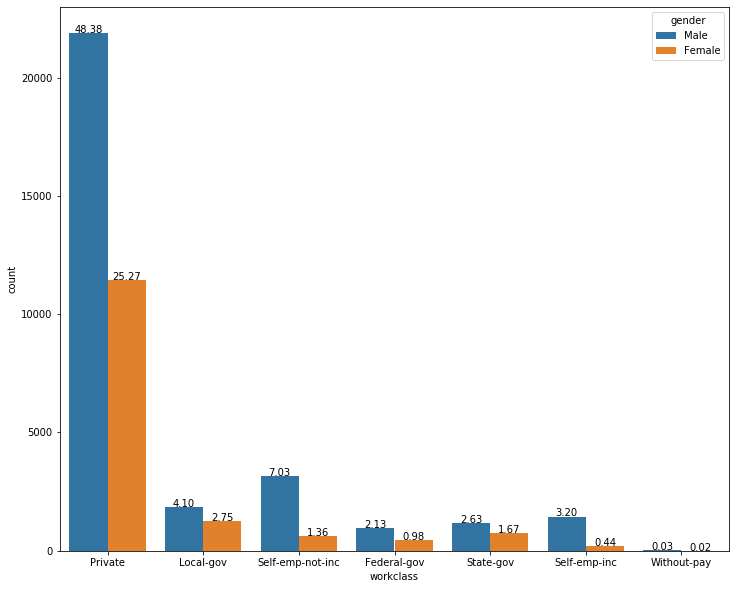

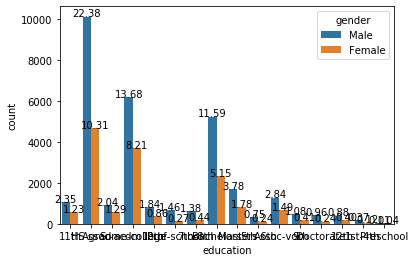

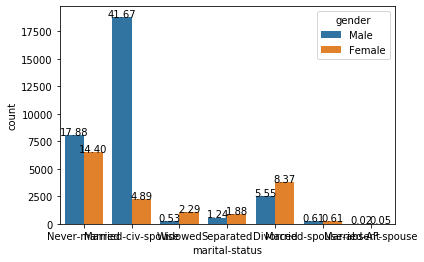

posx and posy should be finite values
posx and posy should be finite values


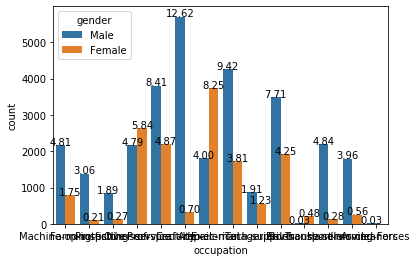

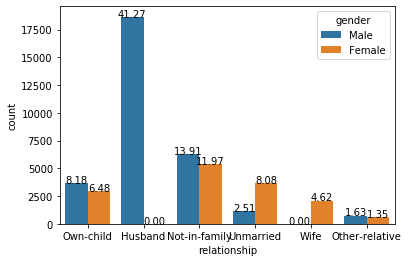

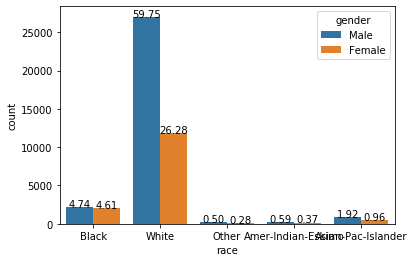

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


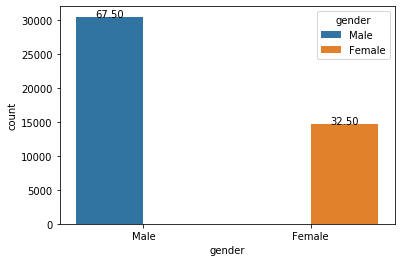

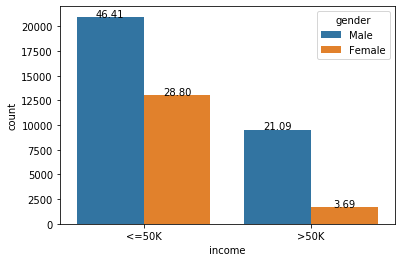

In [13]:
plt.figure(figsize=(12,10))
total = float(len(df["income"]) )

for i in ['workclass','education','marital-status','occupation','relationship','race','gender','income']:
    ax = sns.countplot(x=i, hue="gender", data=df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
    plt.show()

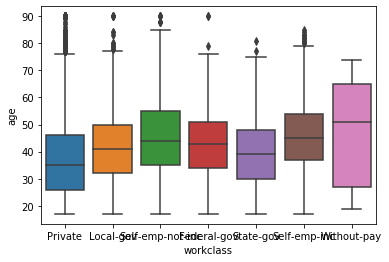

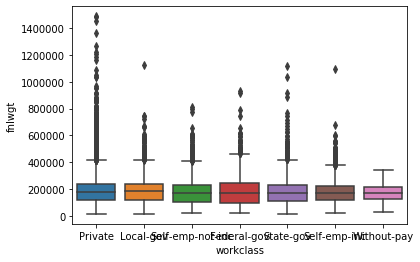

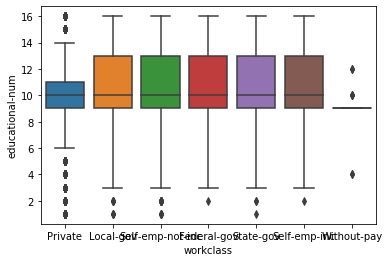

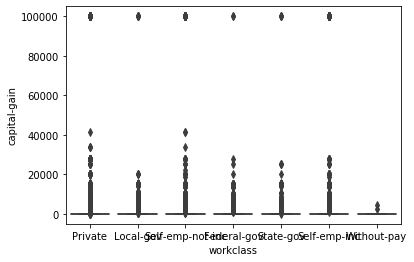

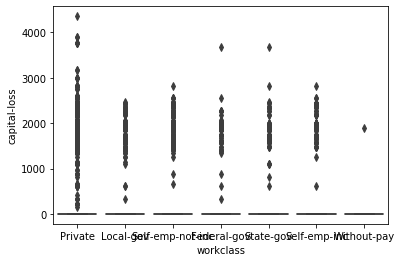

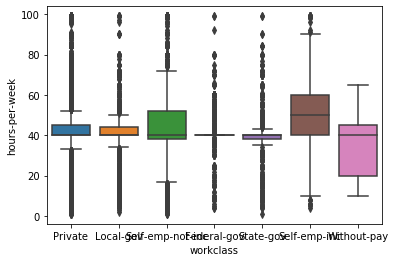

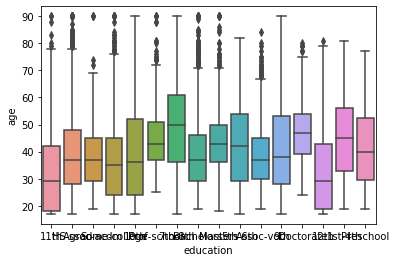

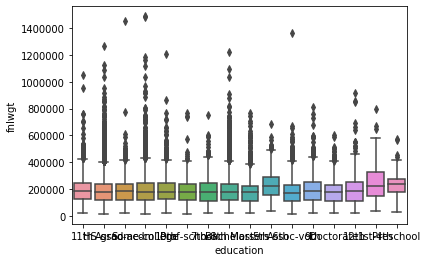

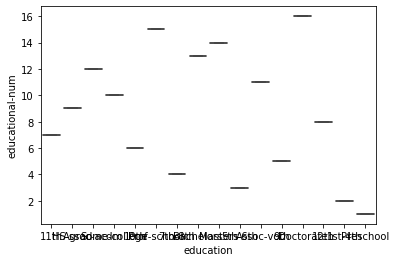

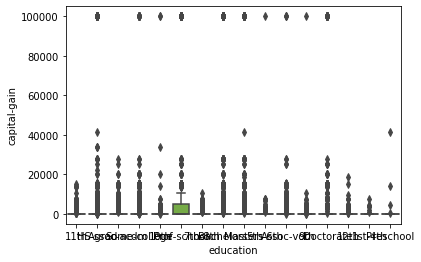

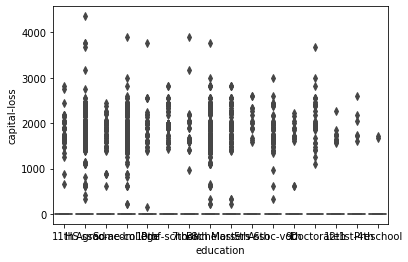

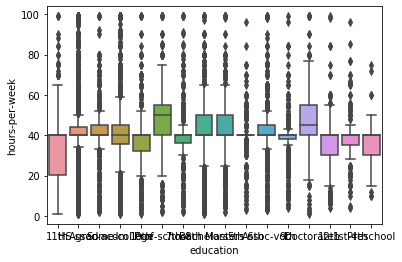

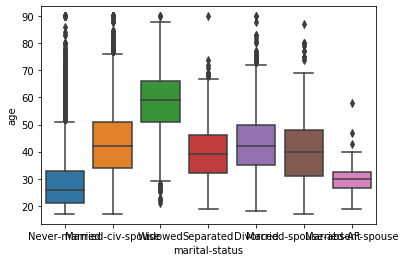

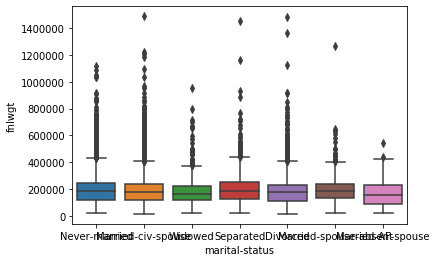

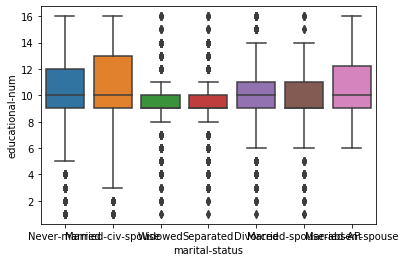

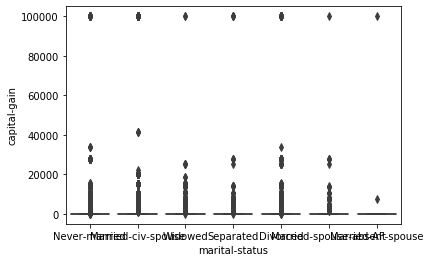

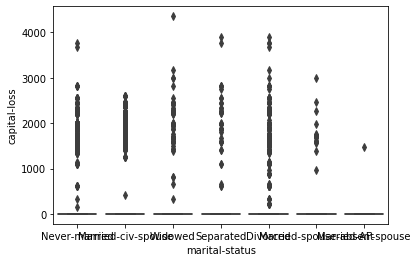

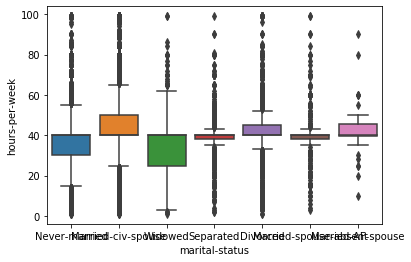

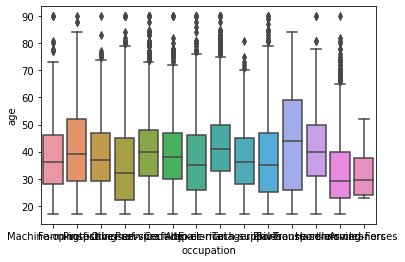

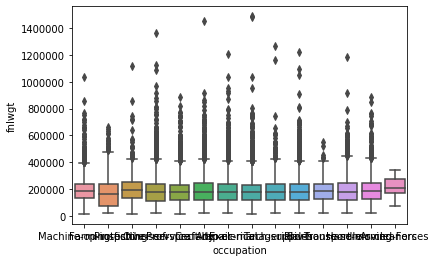

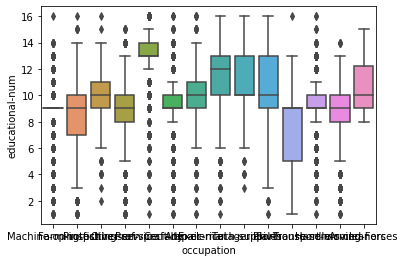

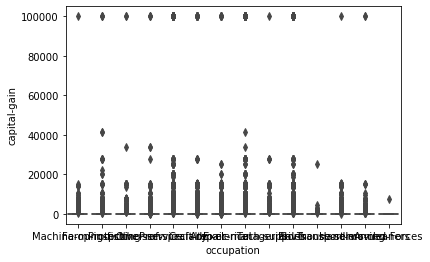

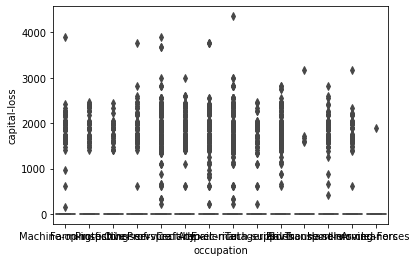

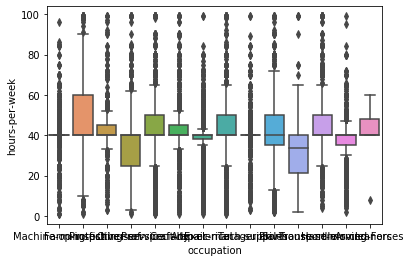

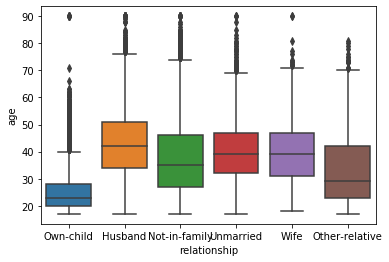

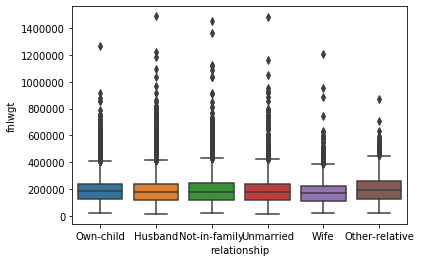

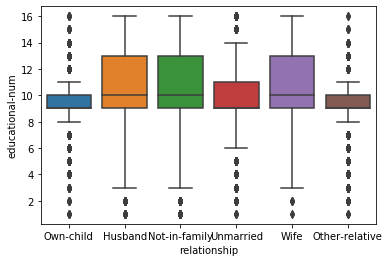

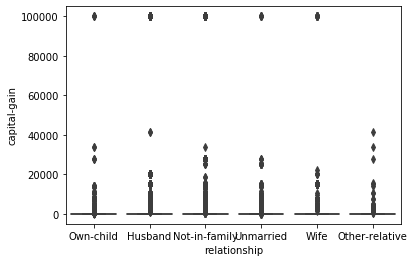

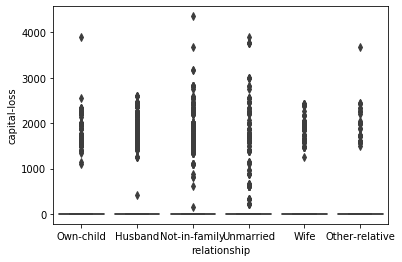

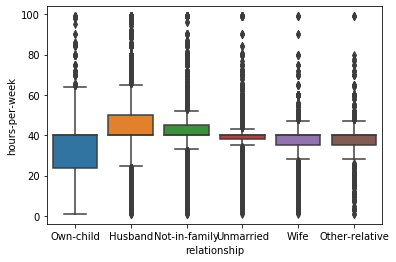

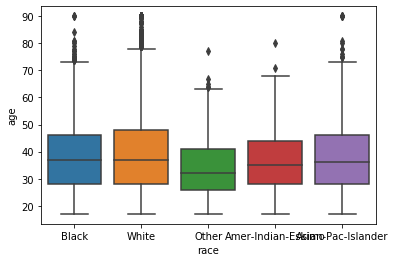

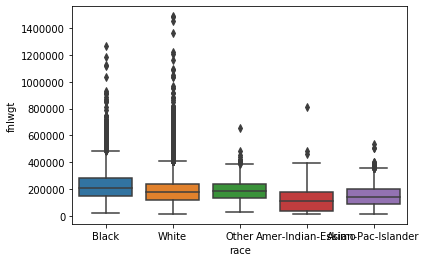

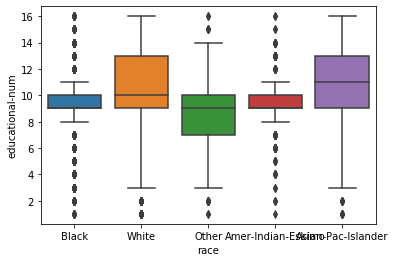

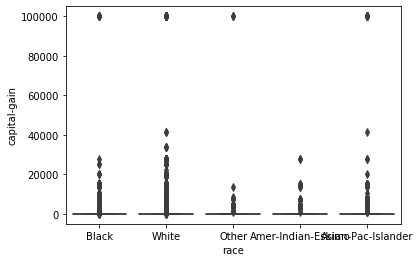

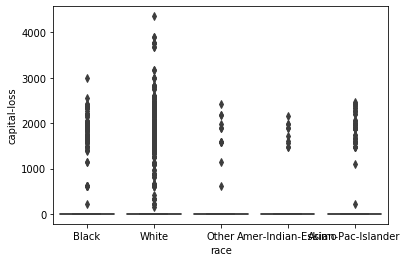

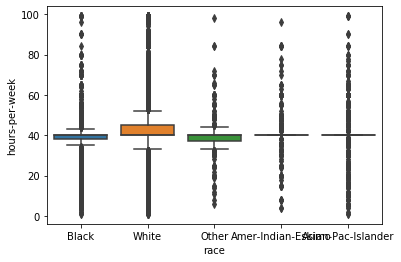

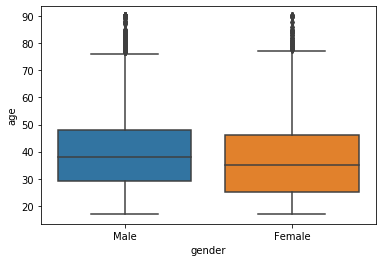

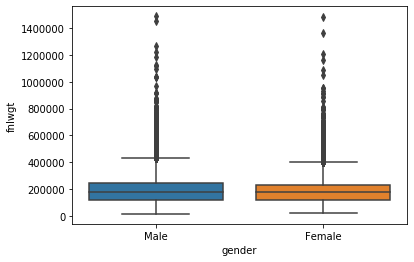

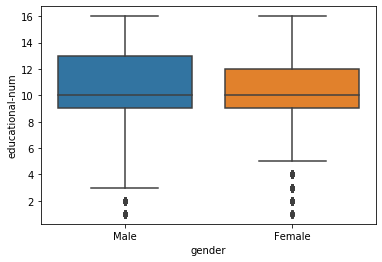

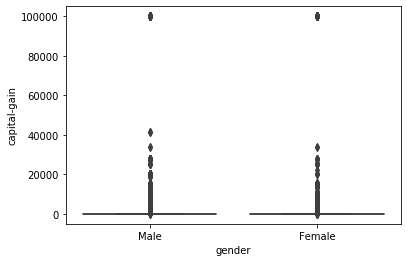

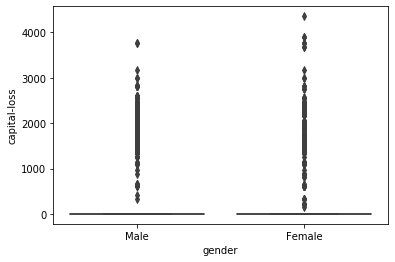

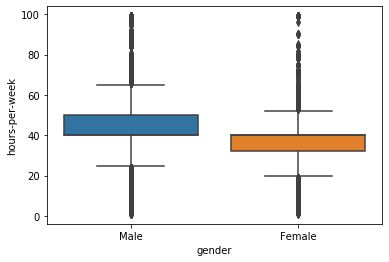

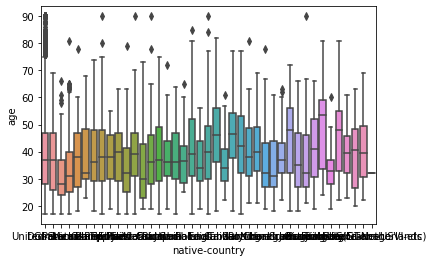

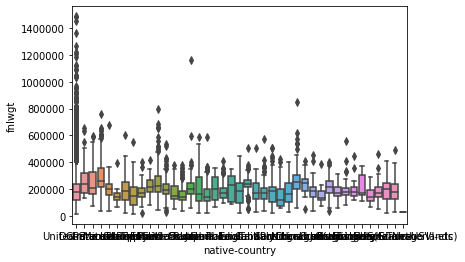

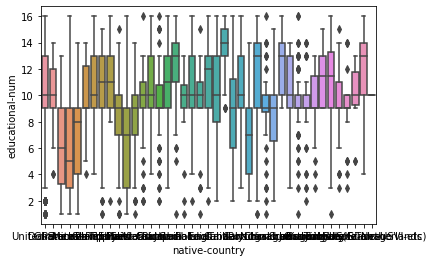

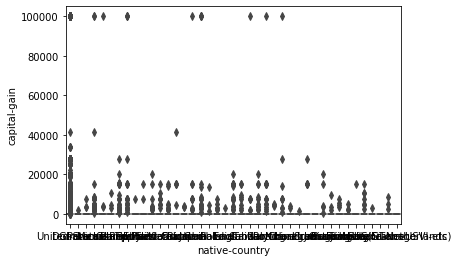

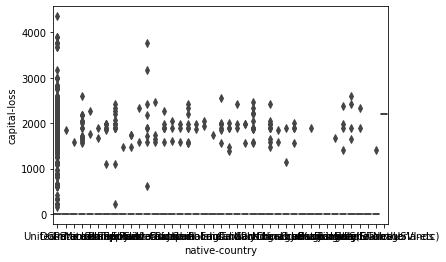

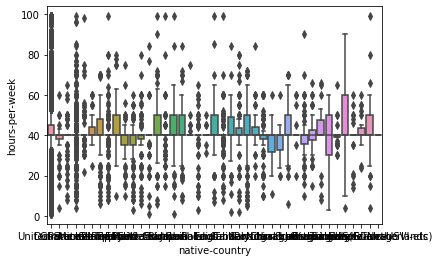

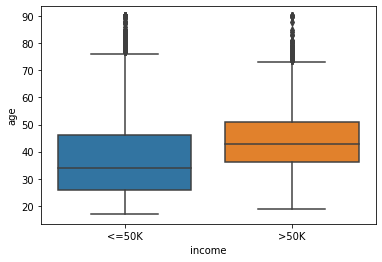

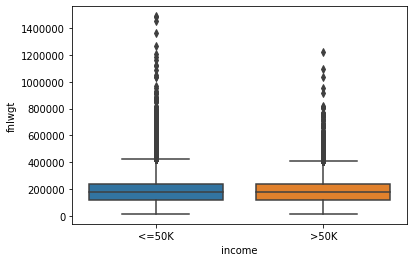

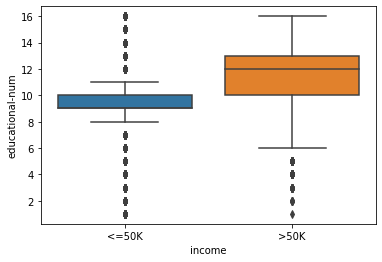

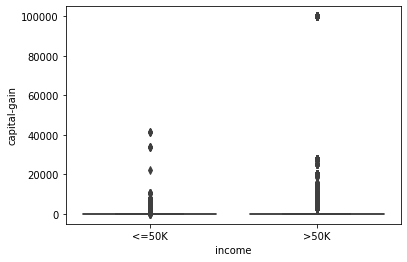

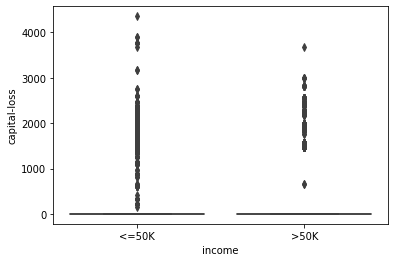

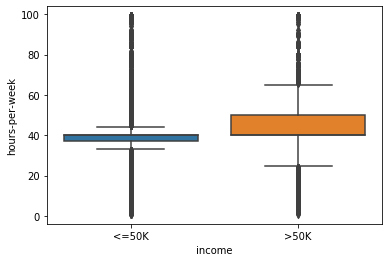

In [14]:
for i in objs:
    for j in ['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']:
        sns.boxplot(x=i,y=j,data=df);
        plt.show()

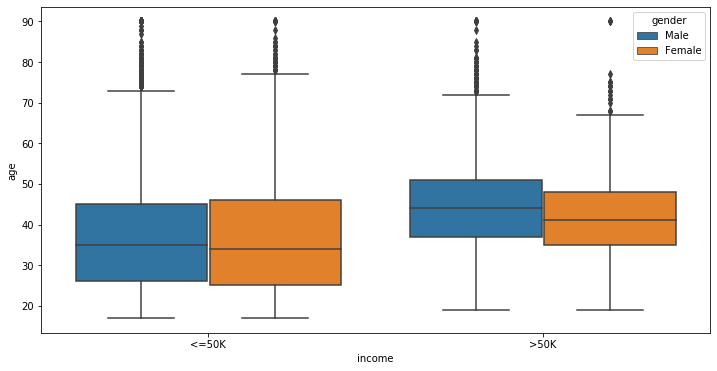

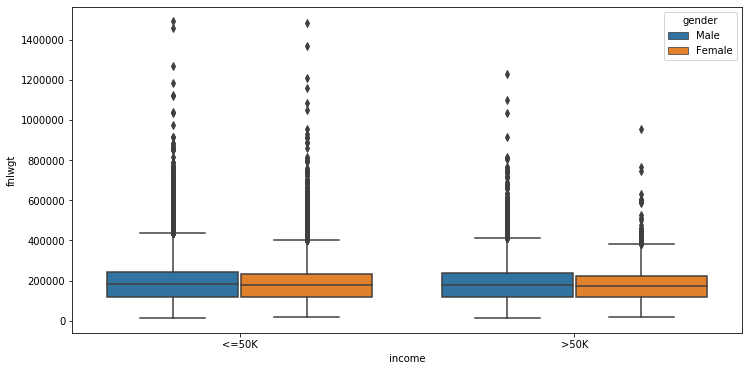

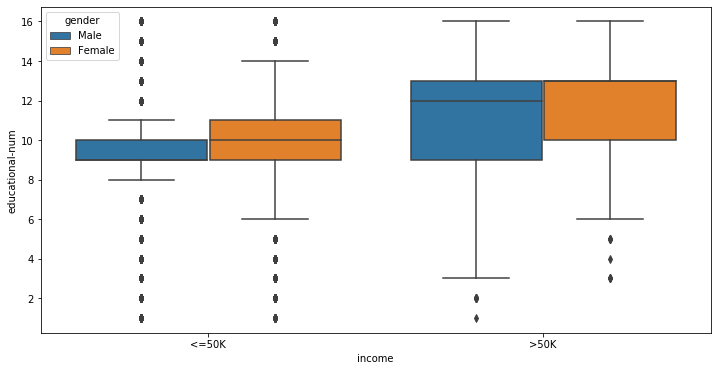

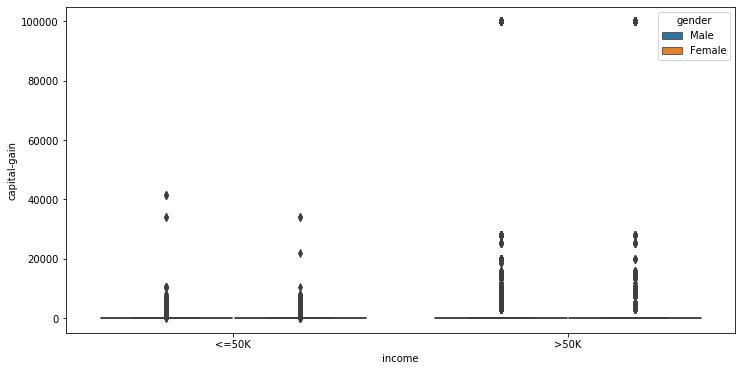

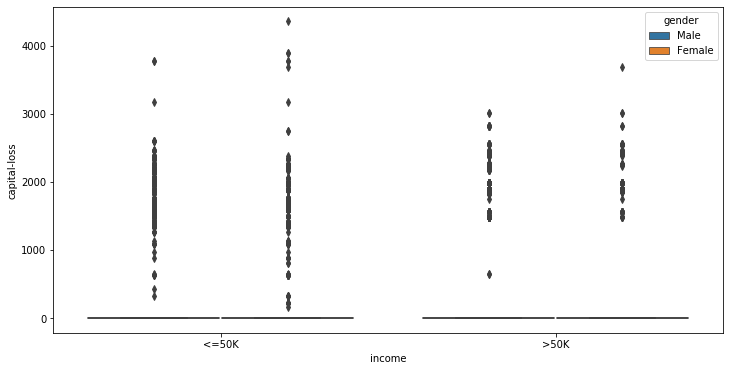

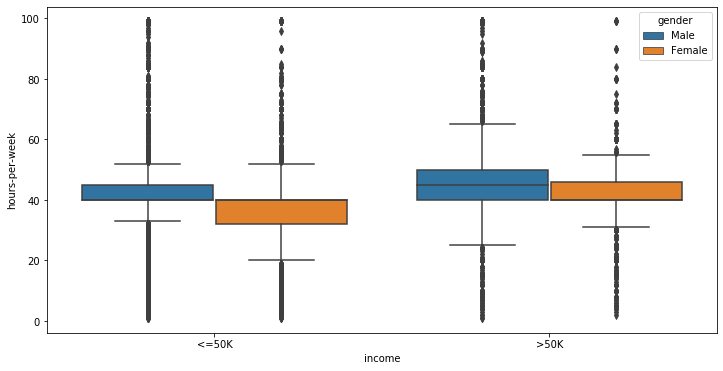

In [15]:
for i in ['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='income',y =i, hue='gender',data=df)
    plt.show()

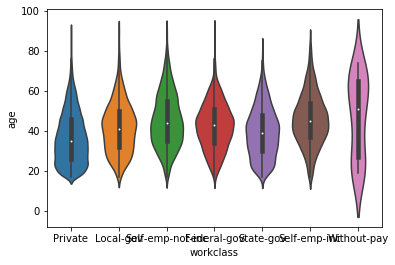

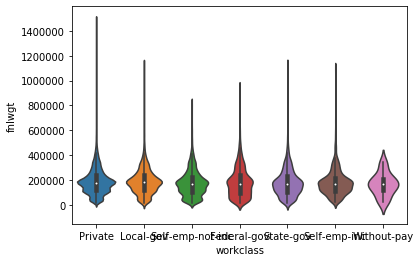

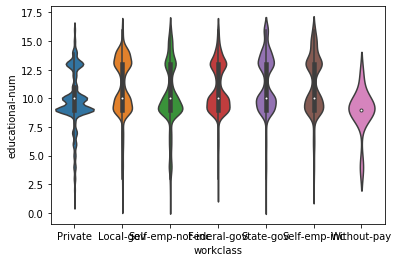

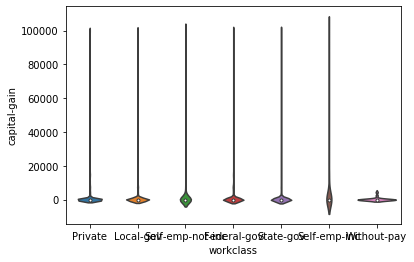

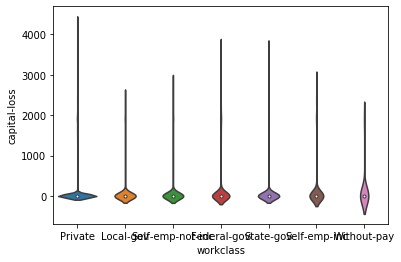

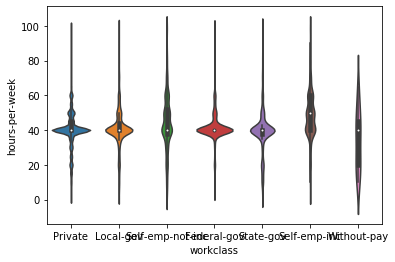

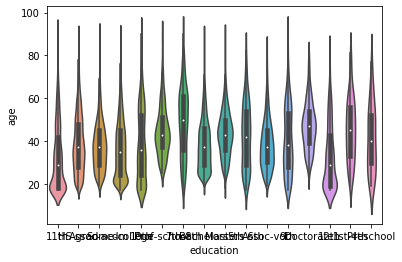

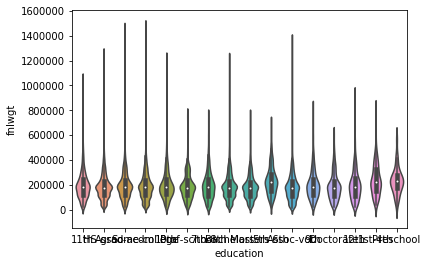

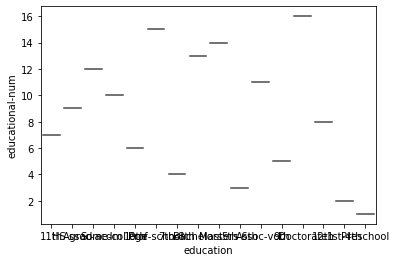

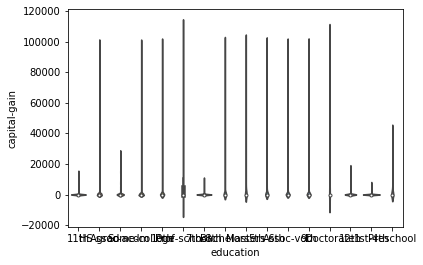

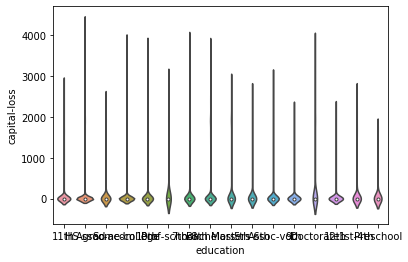

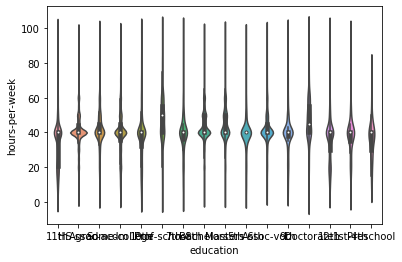

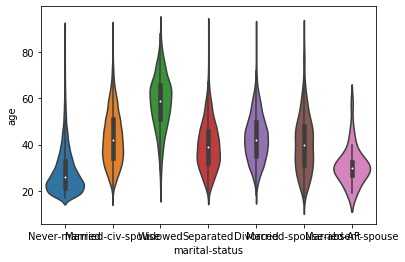

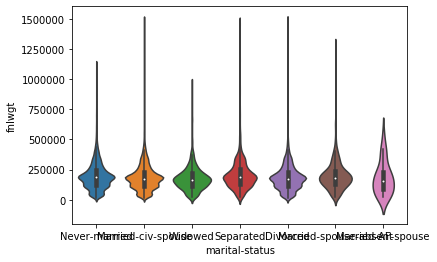

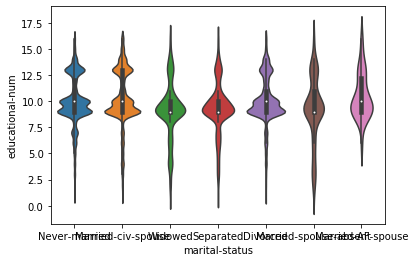

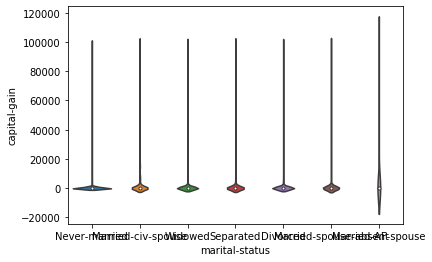

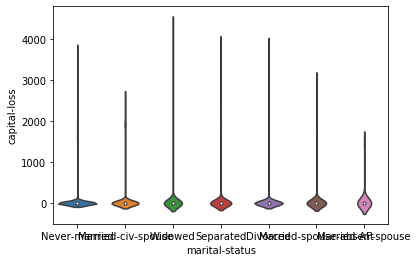

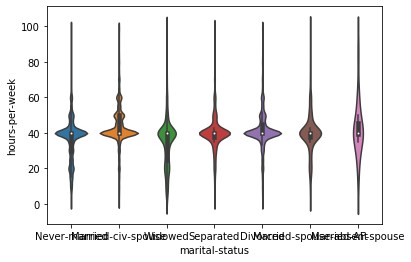

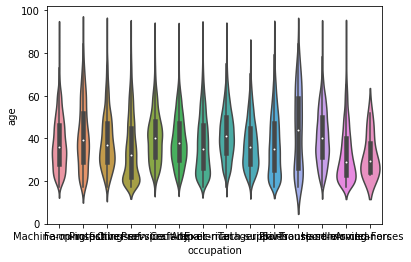

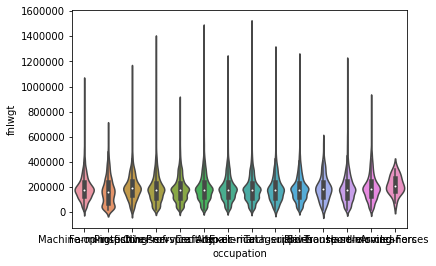

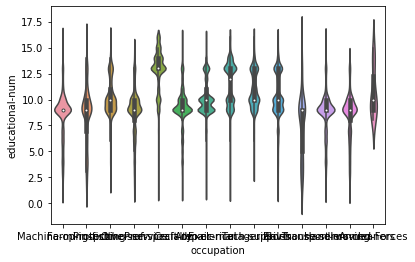

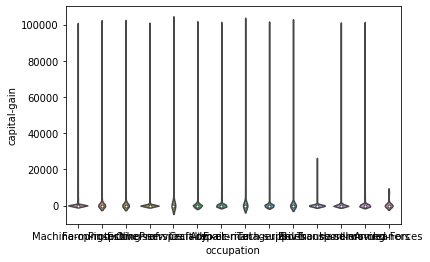

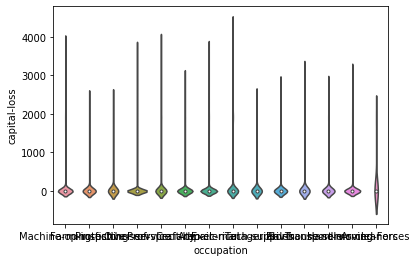

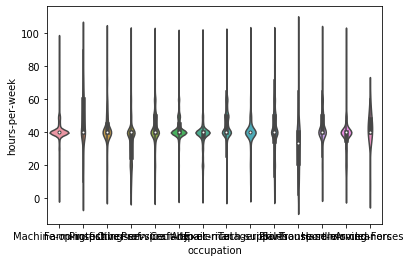

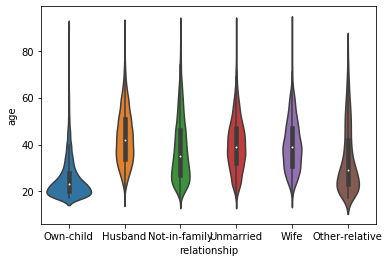

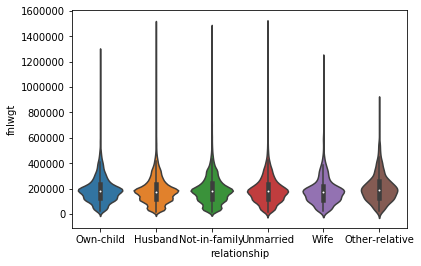

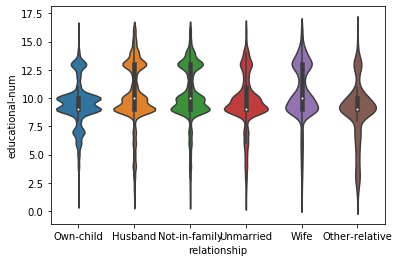

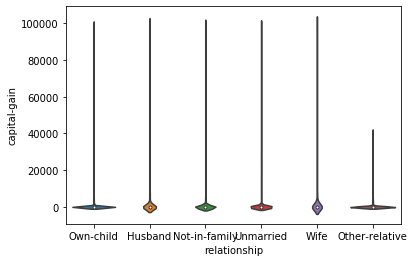

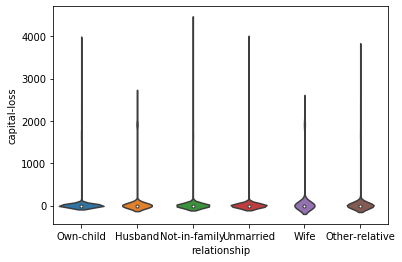

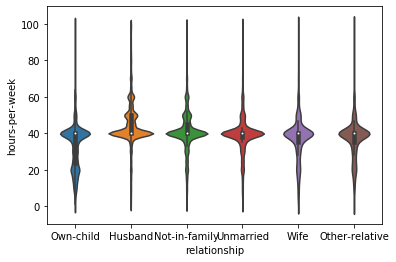

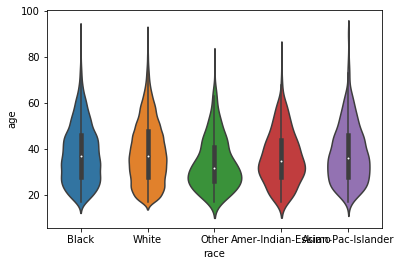

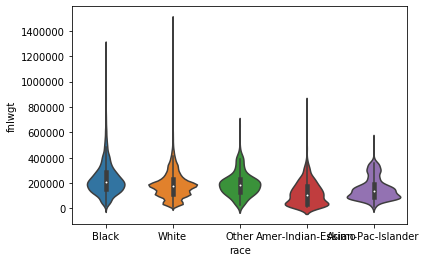

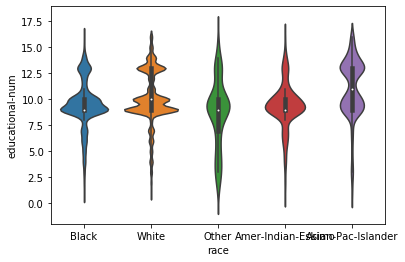

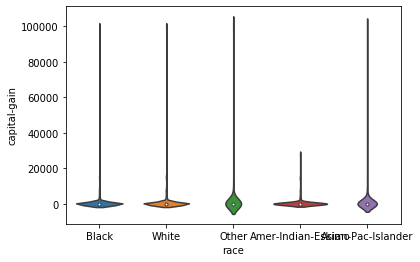

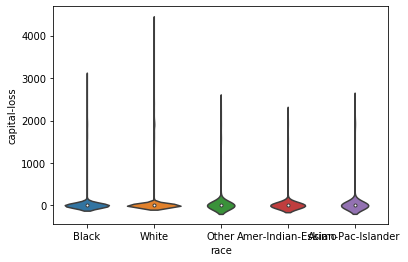

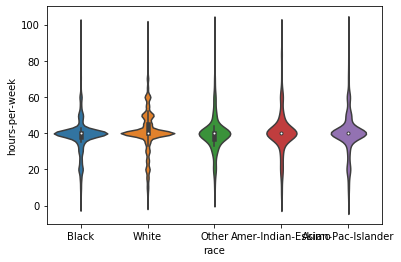

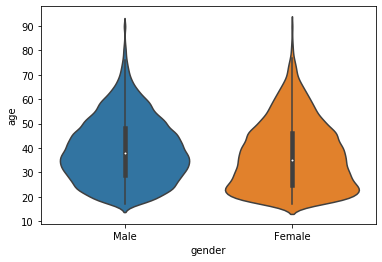

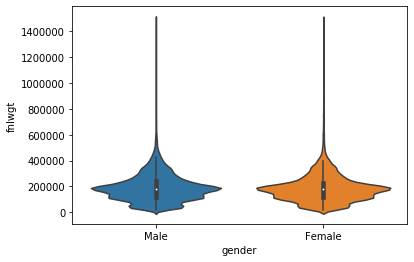

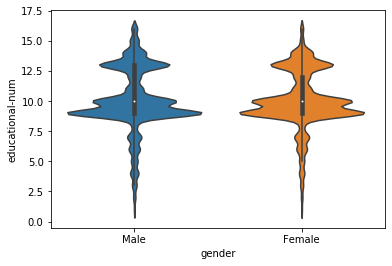

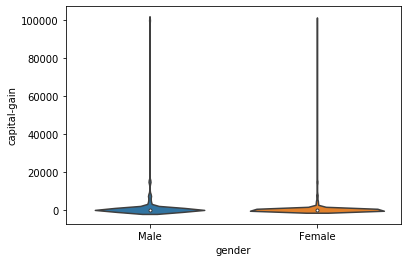

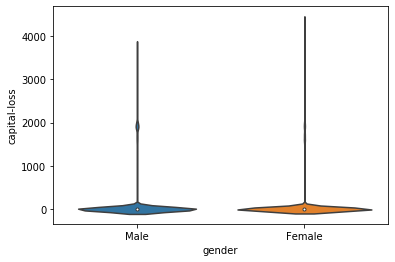

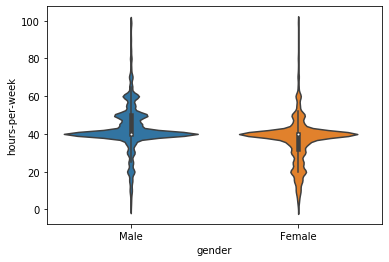

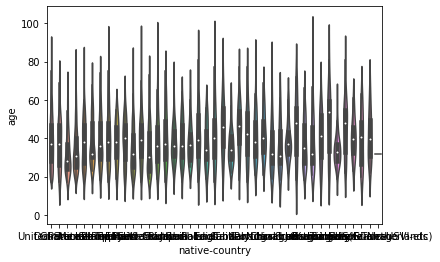

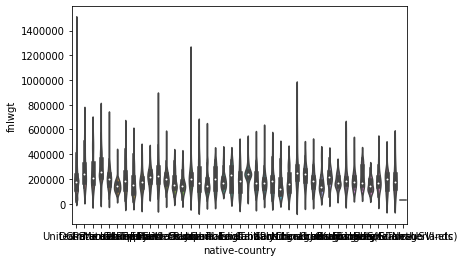

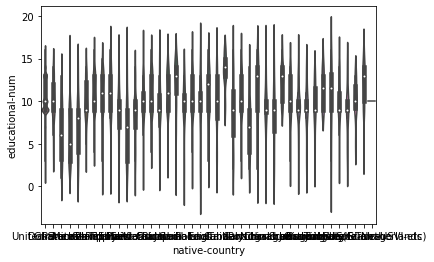

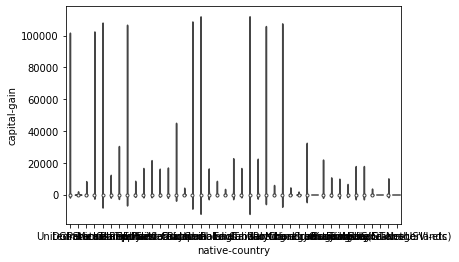

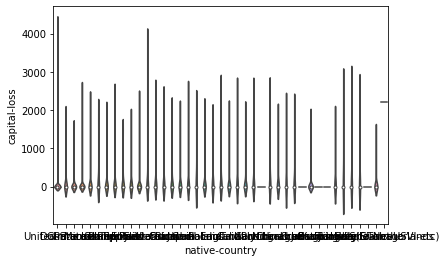

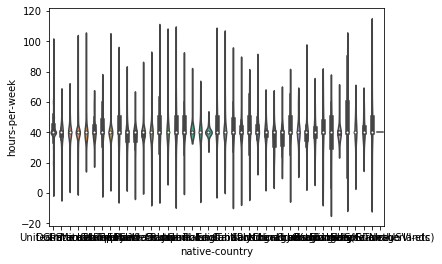

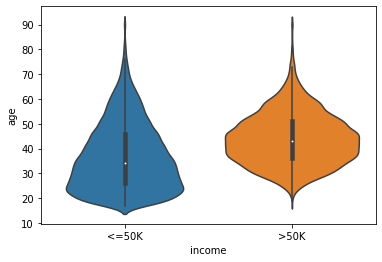

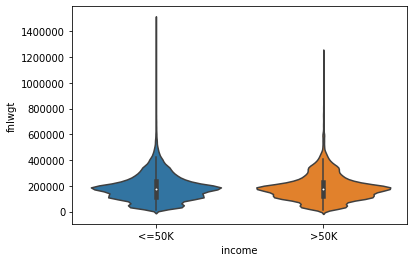

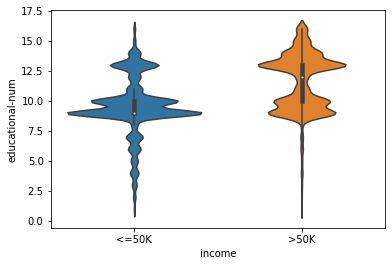

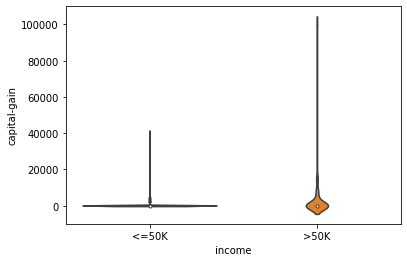

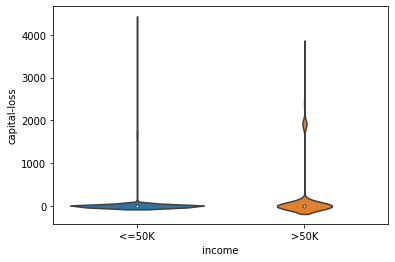

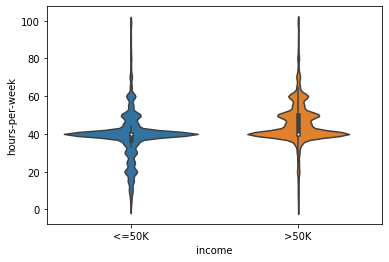

In [16]:
for i in objs:
    for j in ['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']:
        sns.violinplot(x=i,y=j,data=df);
        plt.show()

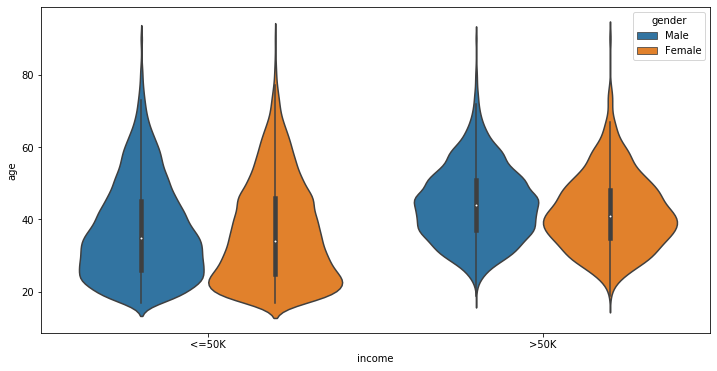

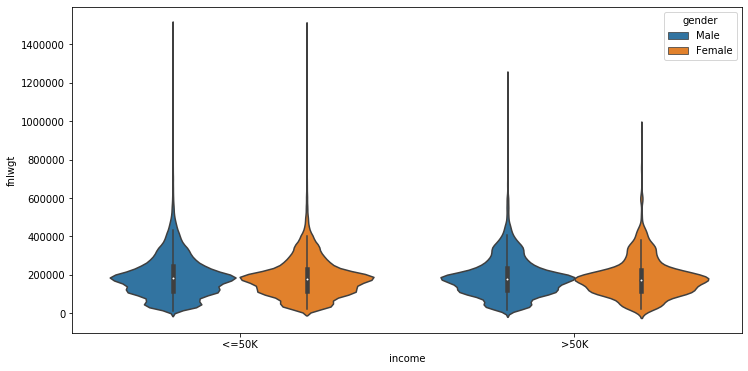

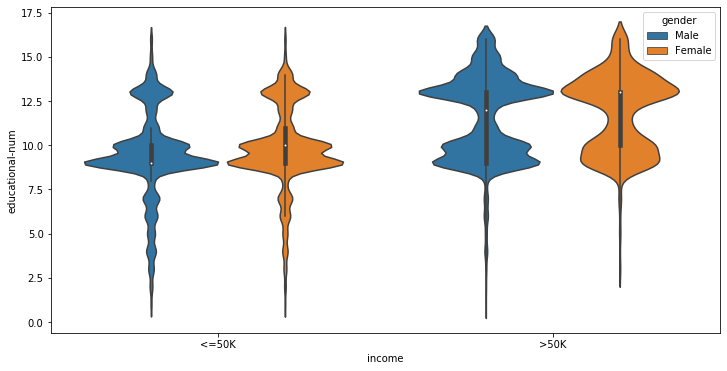

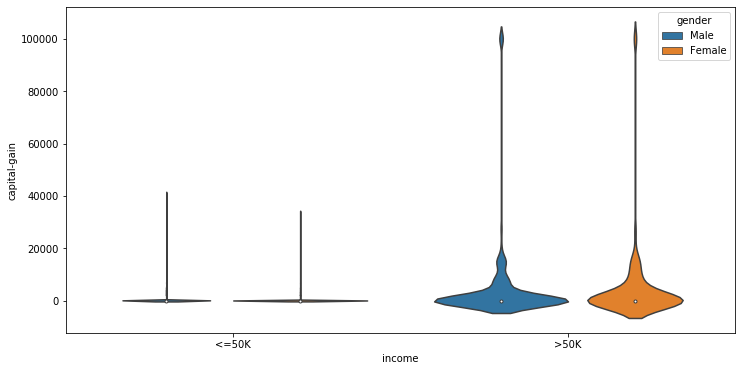

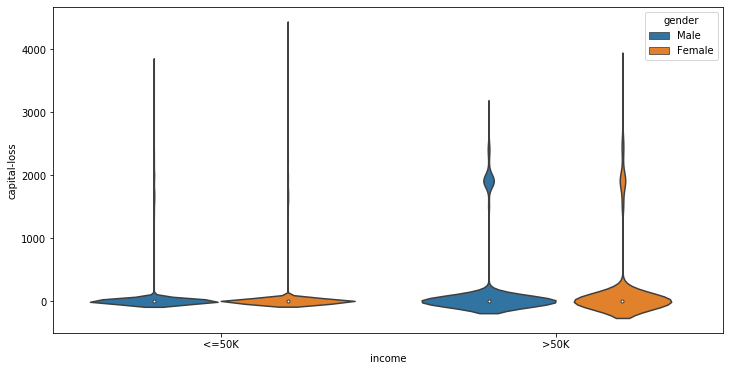

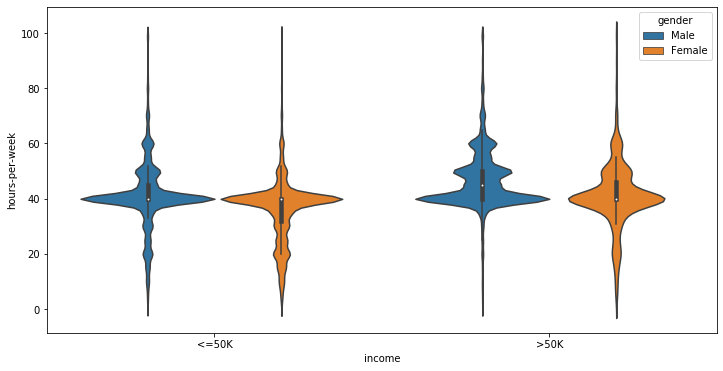

In [17]:
for i in ['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']:
    plt.figure(figsize=(12,6))
    sns.violinplot(x='income',y =i, hue='gender',data=df)
    plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split as t
from sklearn.preprocessing import scale as s

In [19]:
DF = df.apply(LabelEncoder().fit_transform)

In [20]:
y = DF['income'].values
x = DF.drop(['income'],axis=1)
x = DF.values

In [21]:
train_x,test_x,train_y,test_y = t(x,y,test_size=0.2)

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfc = RandomForestClassifier()
rfc.fit(train_x, train_y)
#y_pred = randomforest.predict(X_test)
score_randomforest = rfc.score(test_x,test_y)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 1.0


C:\Users\Aryan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [24]:
y_pred = rfc.predict(test_x)

In [25]:
accuracy_score(test_y,y_pred)

1.0

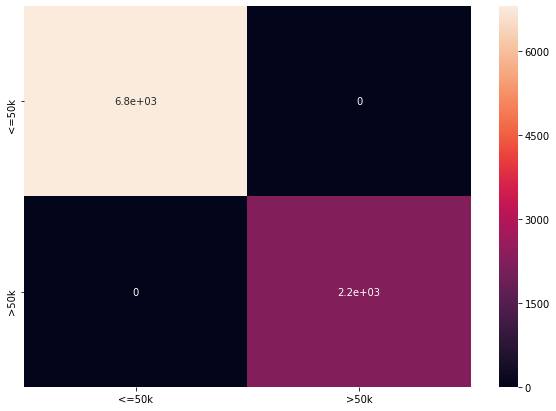

In [26]:
df_cm  = pd.DataFrame(confusion_matrix(test_y,y_pred),['<=50k','>50k'],['<=50k','>50k'])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [27]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6795
           1       1.00      1.00      1.00      2250

   micro avg       1.00      1.00      1.00      9045
   macro avg       1.00      1.00      1.00      9045
weighted avg       1.00      1.00      1.00      9045



AUC = 1.000


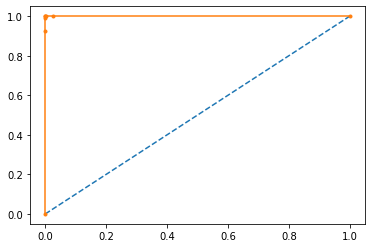

In [28]:
probs = rfc.predict_proba(test_x)
probs = probs[:,1]
auc = roc_auc_score(test_y,probs)
print('AUC = %.3f' % auc)
fpr,tpr,thresholds = roc_curve(test_y,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()